In [29]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Acoustic features analysis

In [33]:
def load_and_process_data(filepath):
    df = pd.read_csv(filepath)
    df['emotion'] = df['filename'].apply(lambda x: x.split('_')[-1].replace('.wav', ''))
    return df

In [32]:
# Function to convert string representations of lists into actual lists
def string_to_float_list(string):
    return np.array([float(item) for item in string.strip('[]').split() if item])

In [13]:
# Function to extract statistical features from a list of floats
def extract_statistical_features(values):
    features = pd.DataFrame()
    features['mean'] = values.apply(np.mean)
    features['std'] = values.apply(np.std)
    features['min'] = values.apply(np.min)
    features['max'] = values.apply(np.max)
    features['skew'] = values.apply(lambda x: pd.Series(x).skew())
    features['kurt'] = values.apply(lambda x: pd.Series(x).kurtosis())
    return features

In [45]:
# Function to perform exploratory data analysis (EDA)
def perform_eda_acoustic(features_df, feature_names):
    # Extract emotion labels
    features_df['emotion'] = features_df['filename'].apply(lambda x: x.split('_')[-1].replace('.wav', ''))
    
    # Initialize the plot
    fig, axs = plt.subplots(len(feature_names), 4, figsize=(20, 5 * len(feature_names)))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    for i, feature_name in enumerate(feature_names):
        for j, stat in enumerate(['mean', 'std', 'skew', 'kurt']):
            sns.boxplot(x='emotion', y=f'{feature_name}_{stat}', data=features_df, ax=axs[i, j])
            axs[i, j].set_title(f'{feature_name.upper()} {stat.capitalize()} Across Emotions')
    
    plt.show()

def perform_eda_prosodic(features_df, feature_columns):
    # Number of rows and columns for the subplot grid
    num_rows = len(feature_columns)
    num_cols = 2  # For distribution plot and variability (box plot)
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    for i, feature_name in enumerate(feature_columns):
        # Distribution of feature across emotions
        for emotion in features_df['emotion'].unique():
            sns.histplot(features_df[features_df['emotion'] == emotion][feature_name], kde=True, label=emotion, ax=axs[i, 0])
        axs[i, 0].set_title(f'Distribution of {feature_name} by Emotion')
        axs[i, 0].legend()
        
        # Variability of feature across emotions (Box Plot)
        sns.boxplot(x='emotion', y=feature_name, data=features_df, ax=axs[i, 1])
        axs[i, 1].set_title(f'{feature_name} Variability by Emotion')
    
    plt.show()
"""

def perform_eda_prosodic(features_df, feature_columns):
    # Extract emotion labels
    features_df['emotion'] = features_df['filename'].apply(lambda x: x.split('_')[-1].replace('.wav', ''))
    
    # Determine the number of features to plot and set a reasonable figure size
    num_features = len(feature_columns)
    fig_height_per_feature = 4  # Set a fixed height for each row of plots
    total_fig_height = fig_height_per_feature * num_features
    
    # Initialize the plot with a manageable size
    fig, axs = plt.subplots(num_features, 2, figsize=(15, total_fig_height))  # 2 columns for distribution and boxplot
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    if num_features == 1:
        axs = [axs]  # Ensure axs is iterable for a single feature
    
    for i, feature_name in enumerate(feature_columns):
        # Distribution of feature across emotions (Histogram)
        for emotion in features_df['emotion'].unique():
            sns.histplot(features_df[features_df['emotion'] == emotion][feature_name], kde=True, label=emotion, ax=axs[i][0])
        axs[i][0].set_title(f'Distribution of {feature_name} by Emotion')
        axs[i][0].legend()

        # Variability of feature across emotions (Box Plot)
        sns.boxplot(x='emotion', y=feature_name, data=features_df, ax=axs[i][1])
        axs[i][1].set_title(f'{feature_name} Variability by Emotion')

    plt.show()
"""

"\n\ndef perform_eda_prosodic(features_df, feature_columns):\n    # Extract emotion labels\n    features_df['emotion'] = features_df['filename'].apply(lambda x: x.split('_')[-1].replace('.wav', ''))\n    \n    # Determine the number of features to plot and set a reasonable figure size\n    num_features = len(feature_columns)\n    fig_height_per_feature = 4  # Set a fixed height for each row of plots\n    total_fig_height = fig_height_per_feature * num_features\n    \n    # Initialize the plot with a manageable size\n    fig, axs = plt.subplots(num_features, 2, figsize=(15, total_fig_height))  # 2 columns for distribution and boxplot\n    plt.subplots_adjust(hspace=0.4, wspace=0.3)\n    \n    if num_features == 1:\n        axs = [axs]  # Ensure axs is iterable for a single feature\n    \n    for i, feature_name in enumerate(feature_columns):\n        # Distribution of feature across emotions (Histogram)\n        for emotion in features_df['emotion'].unique():\n            sns.histplot(f

In [25]:
# Function to visualize the feature correlation matrix
def visualize_correlation(features_df, feature_columns):
    # Compute the correlation matrix
    correlation_matrix = features_df[feature_columns].corr()

    # Generate a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Feature Correlation Matrix with Annotations')
    plt.show()

In [18]:
def plot_emotion_distribution(features_df):
    sns.countplot(x='emotion', data=features_df)
    plt.title('Distribution of Emotions')
    plt.xticks(rotation=45)
    plt.show()

In [19]:
def plot_feature_distribution_by_emotion(features_df, feature_name):
    plt.figure(figsize=(10, 6))
    for emotion in features_df['emotion'].unique():
        sns.histplot(features_df[features_df['emotion'] == emotion][feature_name], kde=True, label=emotion)
    plt.title(f'Distribution of {feature_name} by Emotion')
    plt.legend()
    plt.show()

In [20]:
def plot_pairwise_feature_relationships(features_df, feature_names):
    sns.pairplot(features_df, vars=feature_names, hue='emotion', palette='bright')
    plt.suptitle('Pairwise Feature Relationships by Emotion', y=1.02)
    plt.show()

In [21]:
def plot_feature_variability(features_df, feature_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='emotion', y=feature_name, data=features_df)
    plt.title(f'{feature_name} Variability by Emotion')
    plt.show()

In [22]:
def plot_temporal_feature(example_mfccs):
    plt.plot(example_mfccs)
    plt.title('MFCCs Over Time for a Single Sample')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.show()

In [23]:
def plot_correlation_heatmap_with_annotations(correlation_matrix):
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Feature Correlation Matrix with Annotations')
    plt.show()

In [30]:
def plot_pca_scatter(features_df, features_to_standardize):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_df[features_to_standardize])
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    principal_df['emotion'] = features_df['emotion']

    sns.scatterplot(x='PC1', y='PC2', hue='emotion', data=principal_df, palette='bright')
    plt.title('PCA of Features by Emotion')
    plt.show()

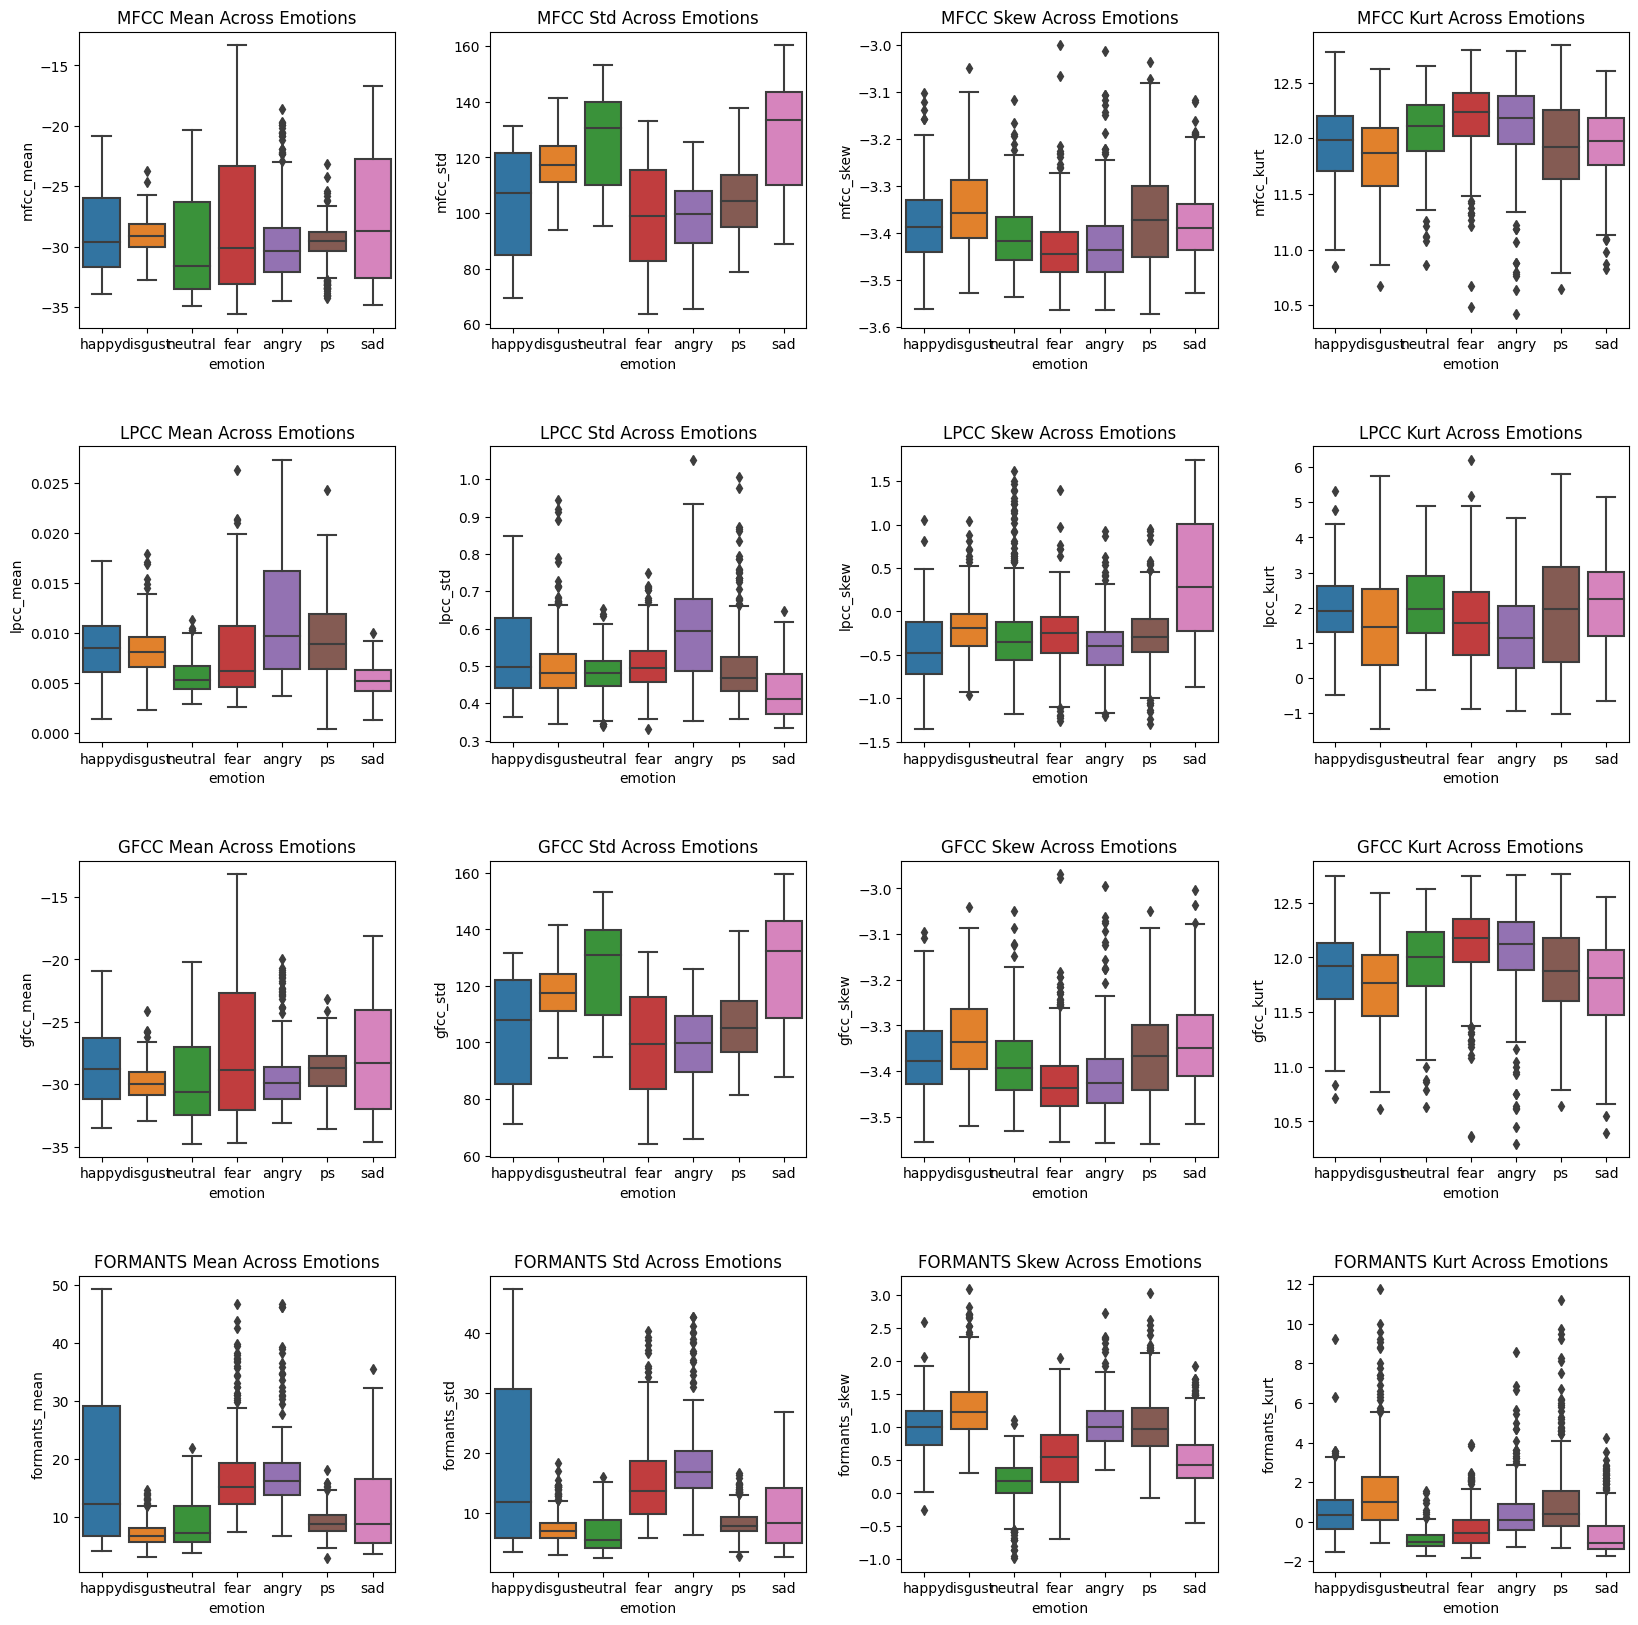

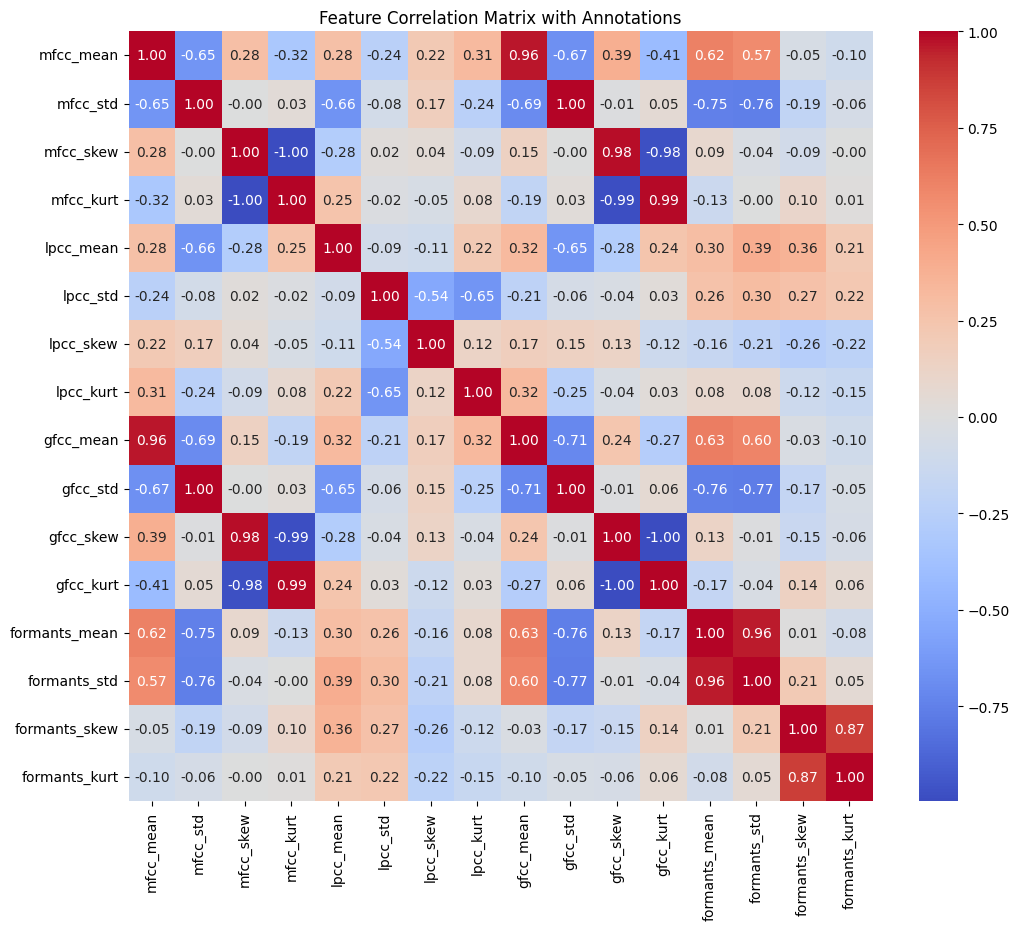

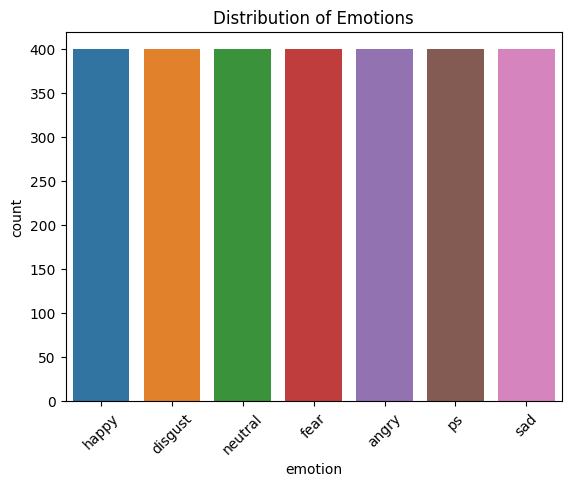

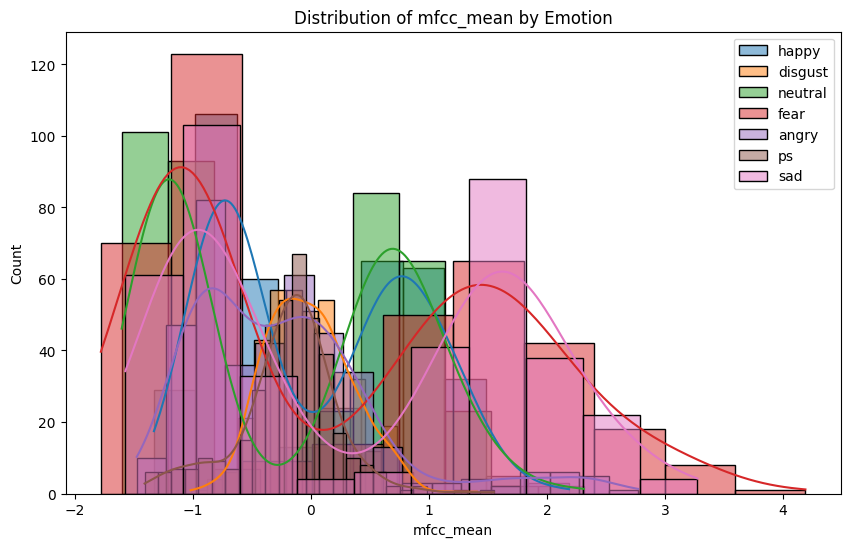

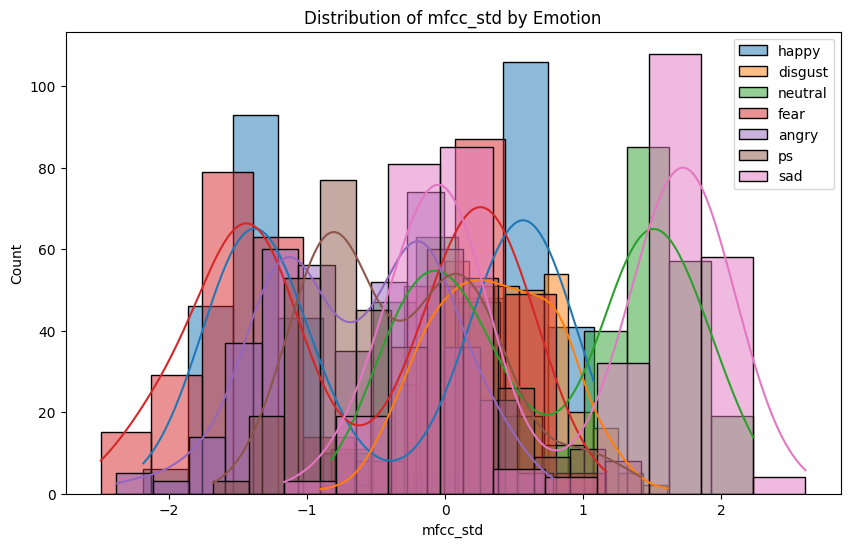

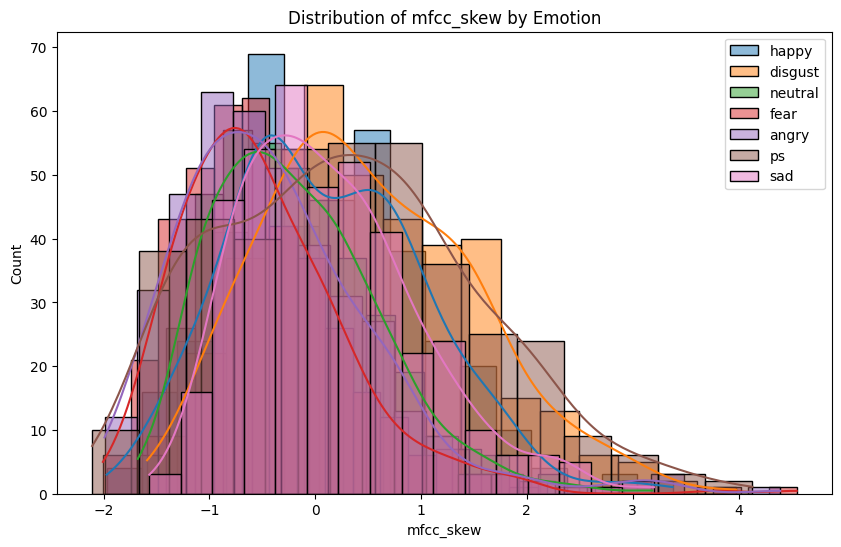

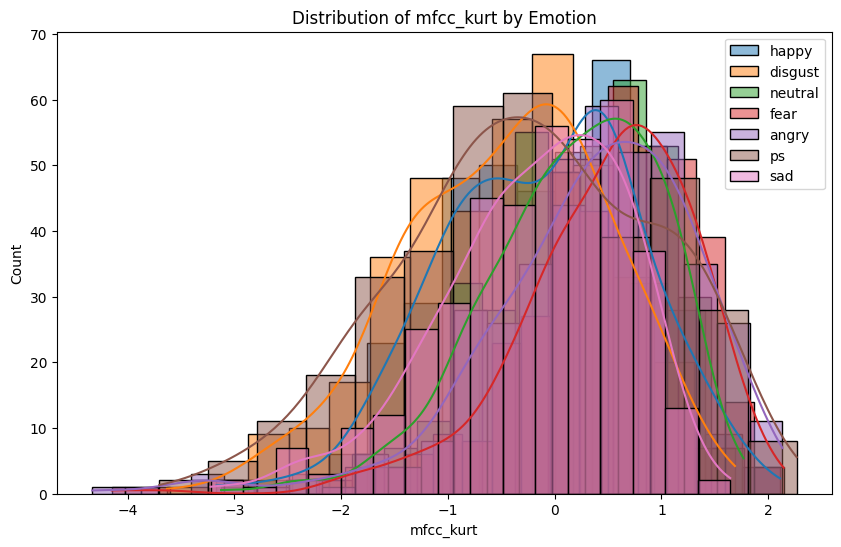

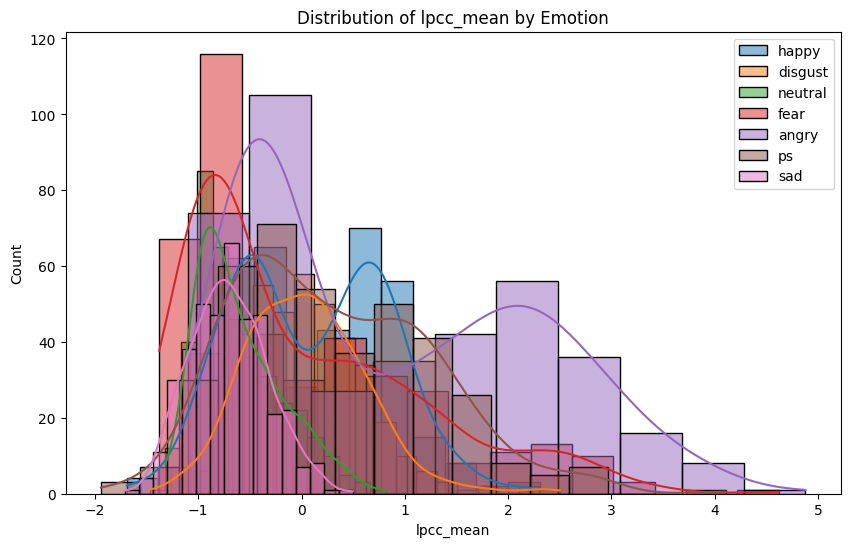

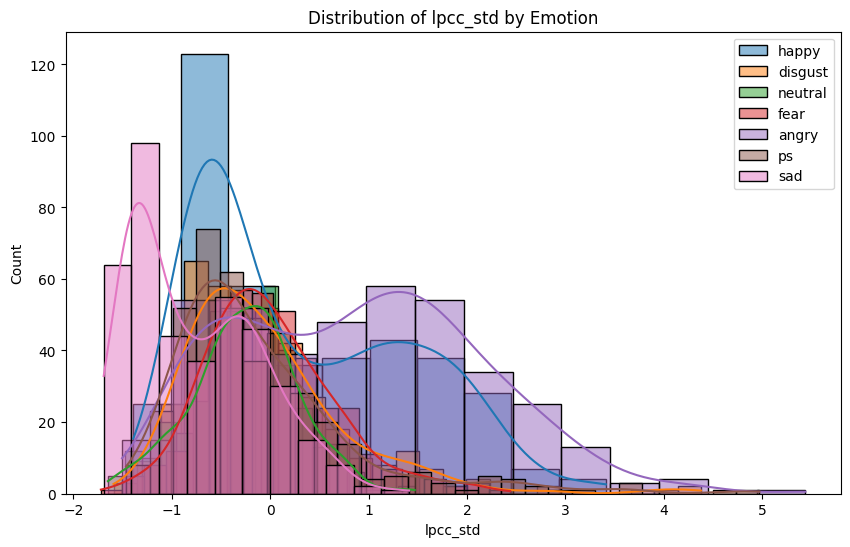

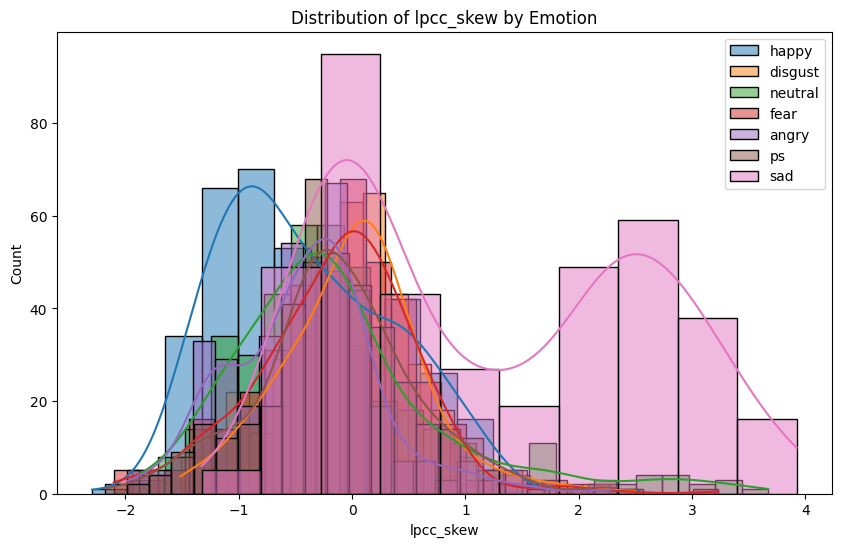

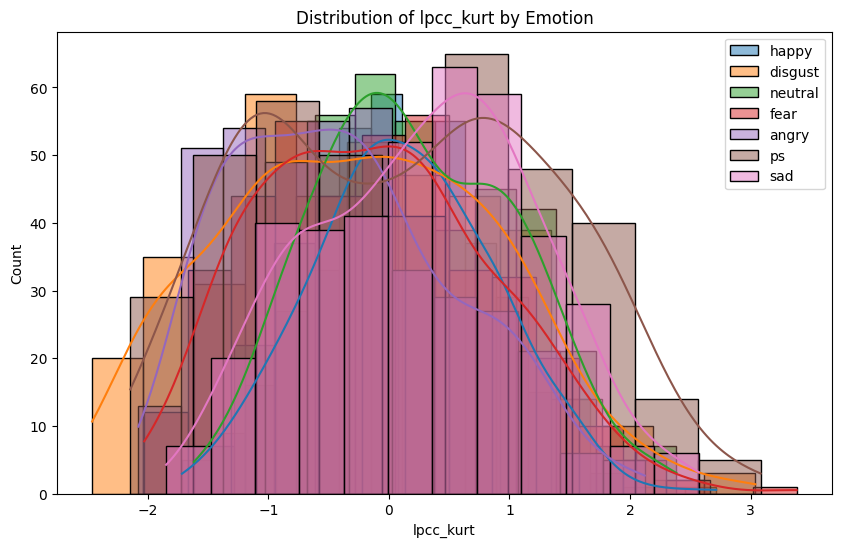

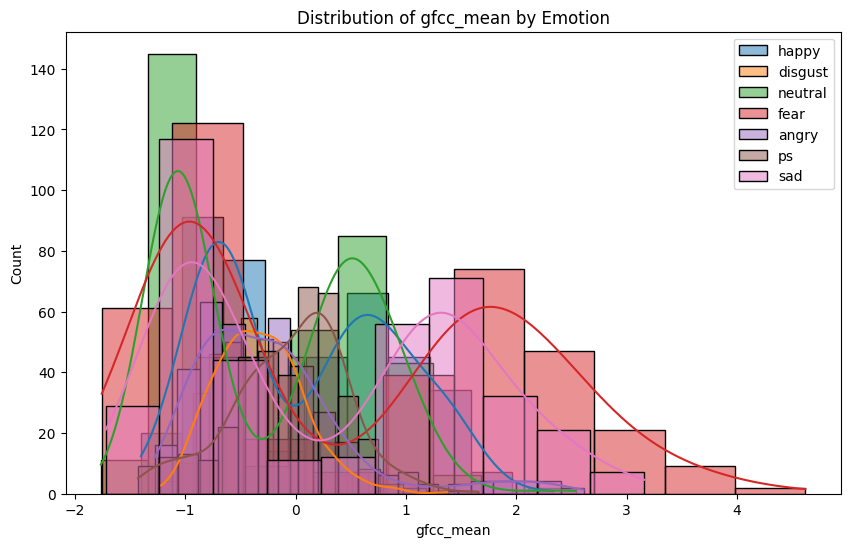

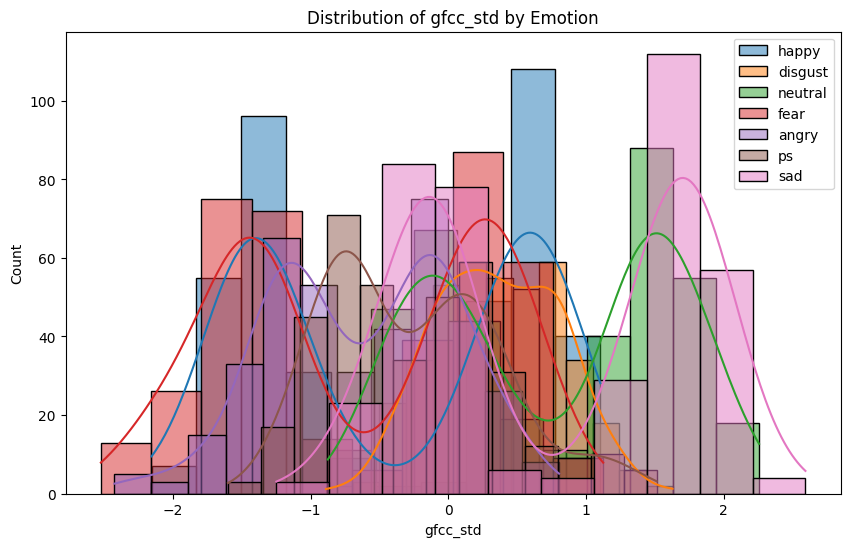

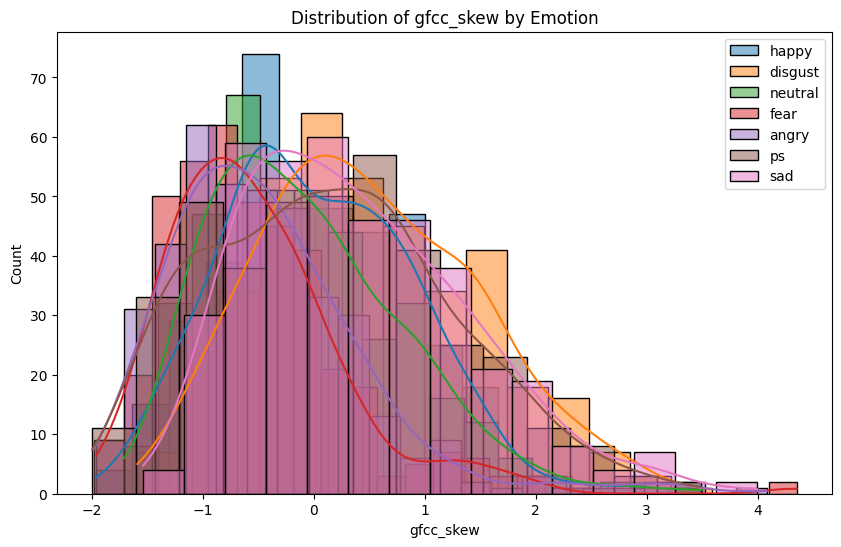

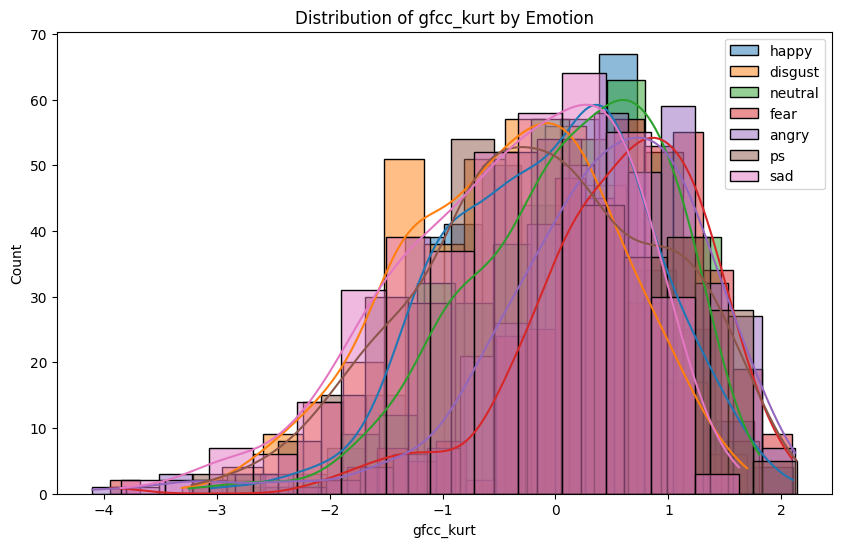

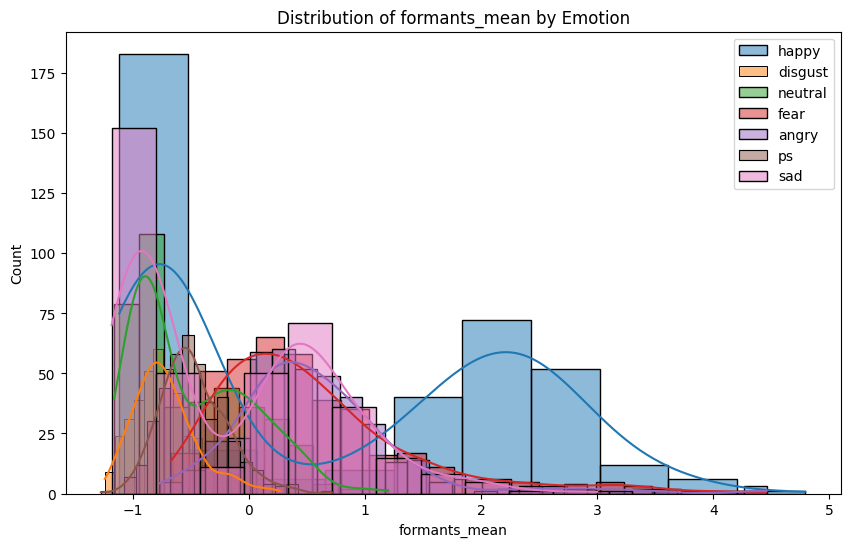

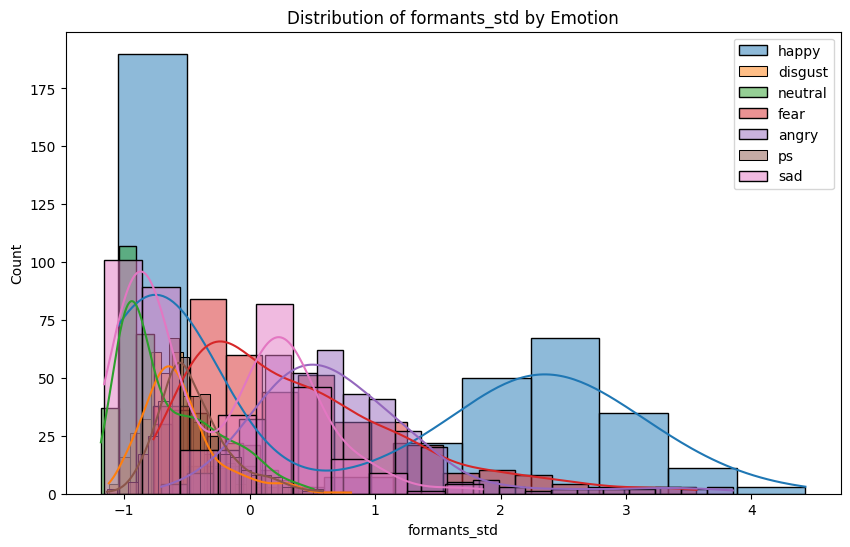

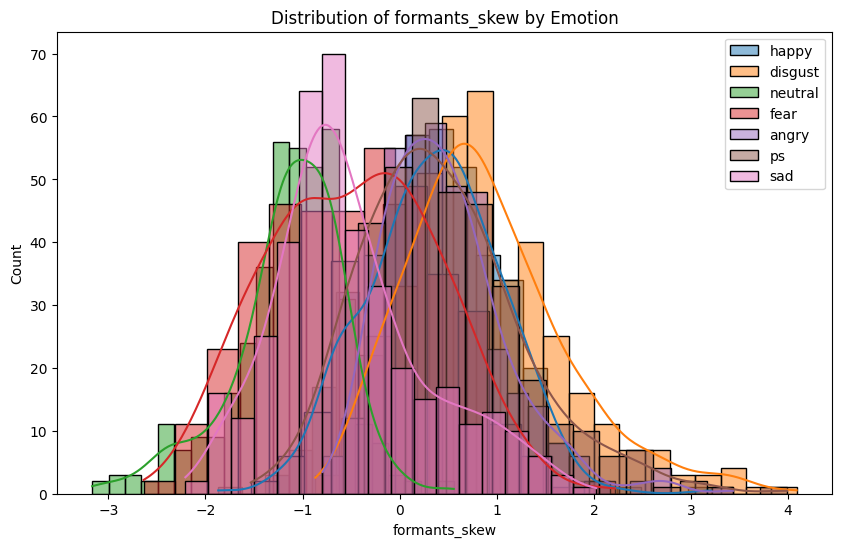

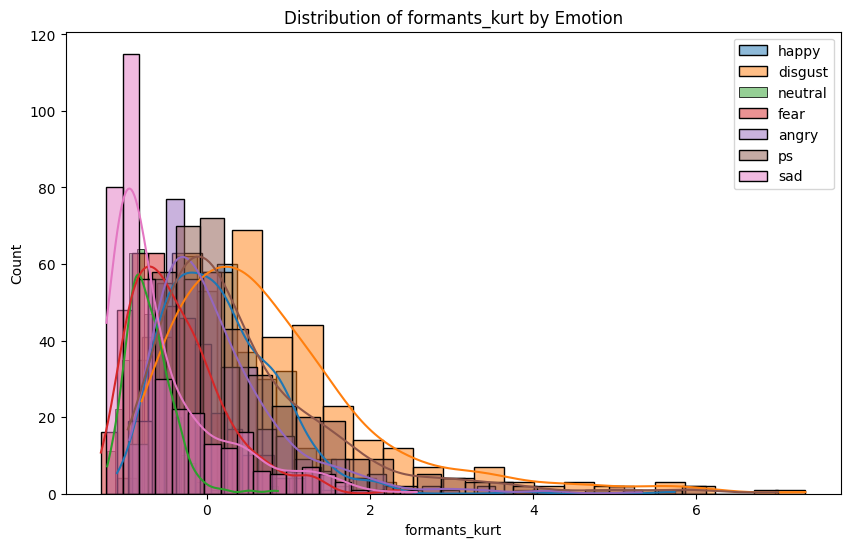

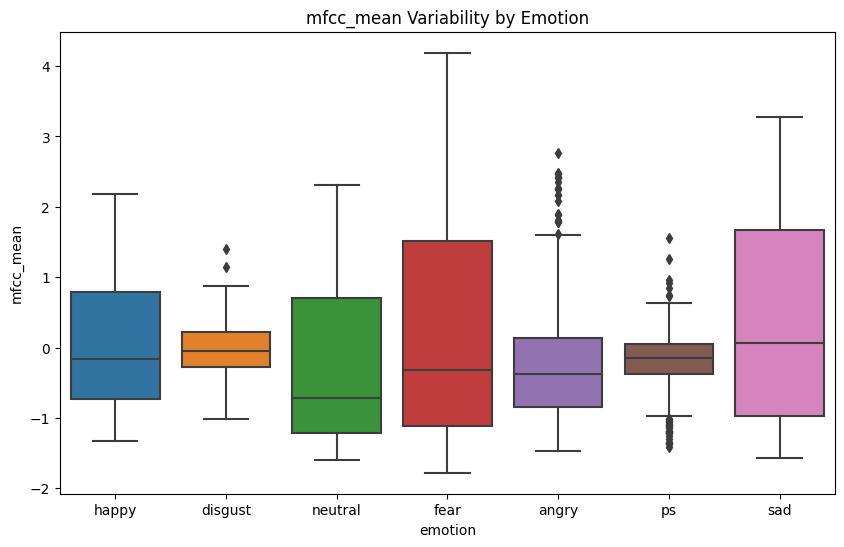

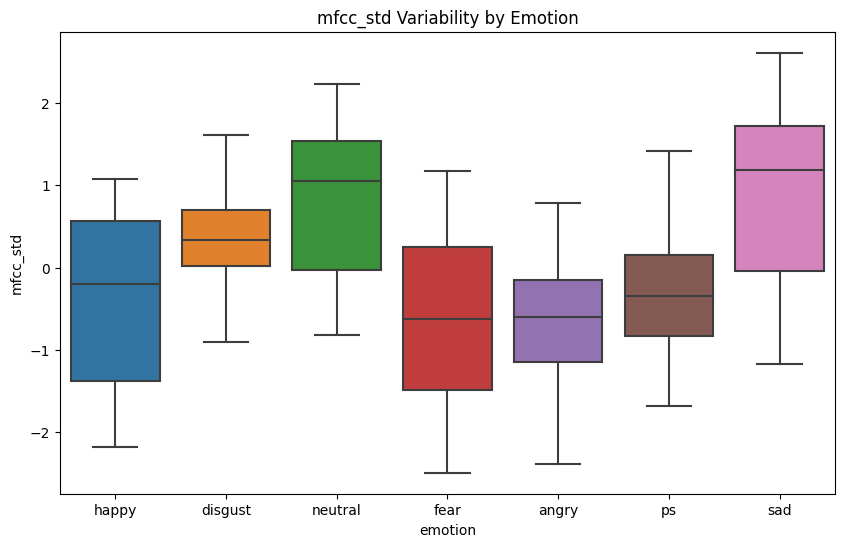

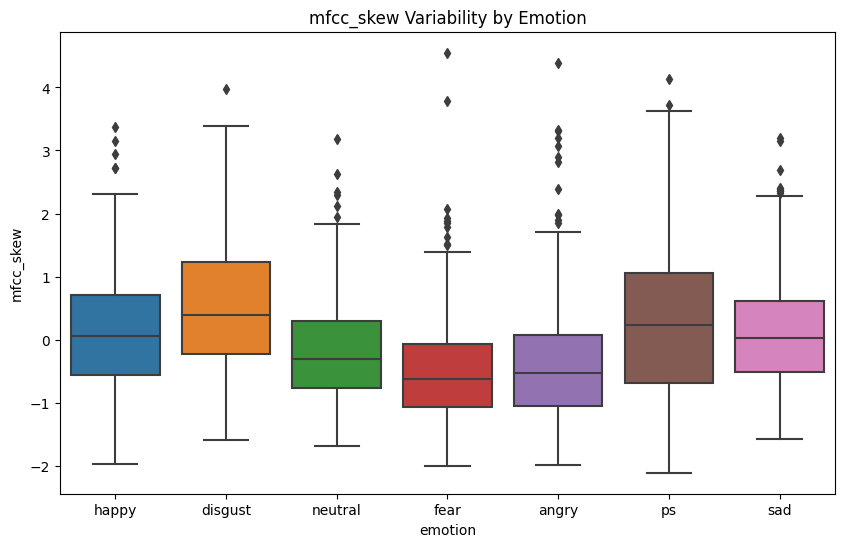

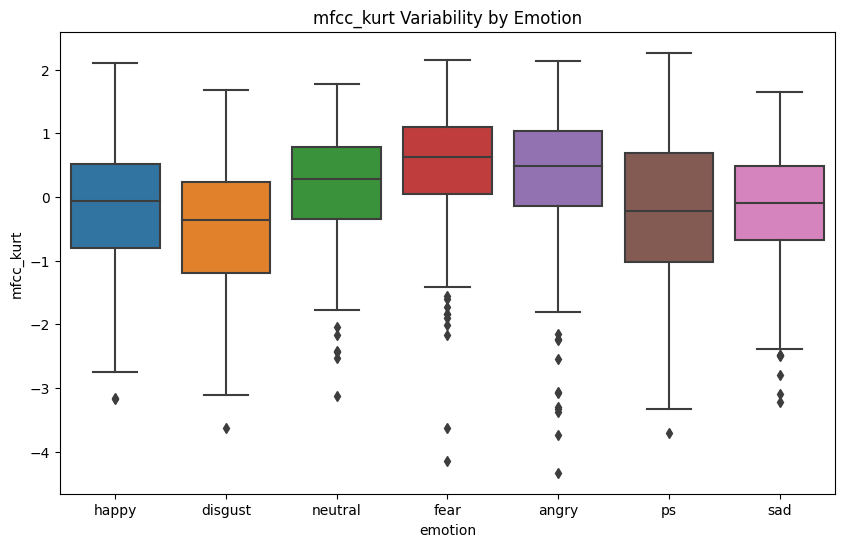

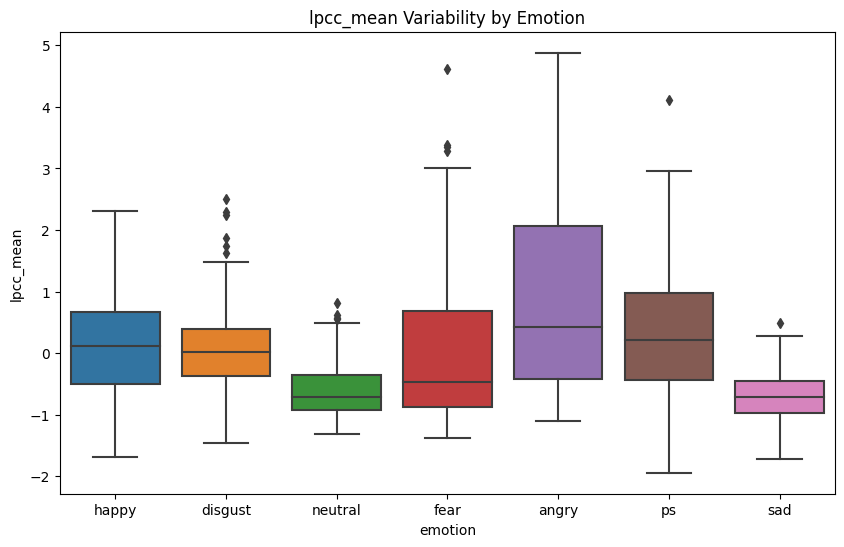

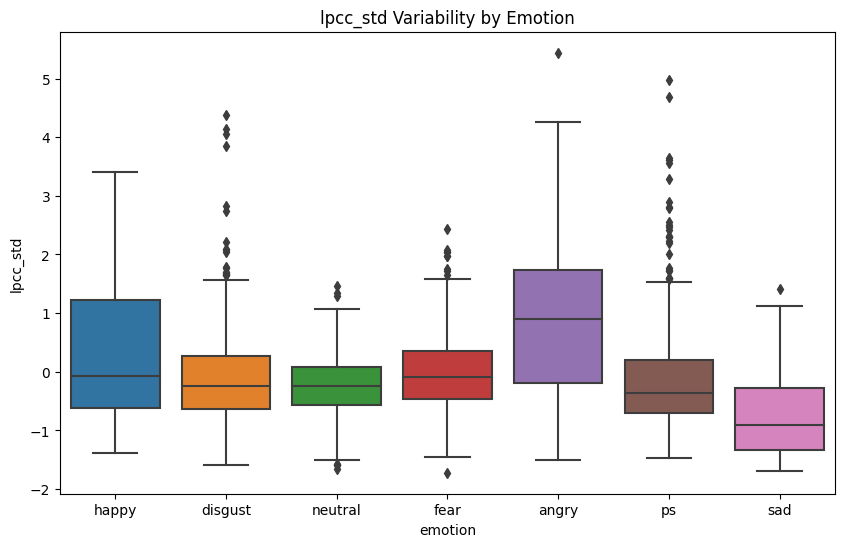

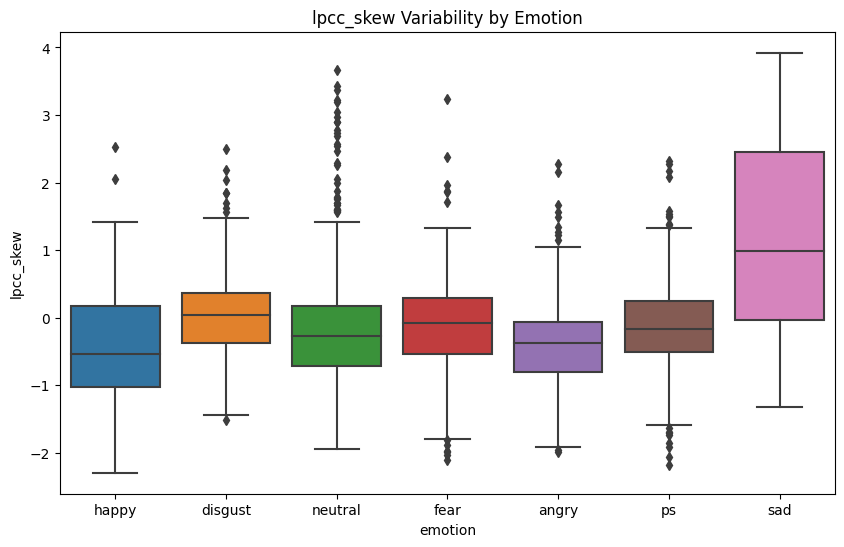

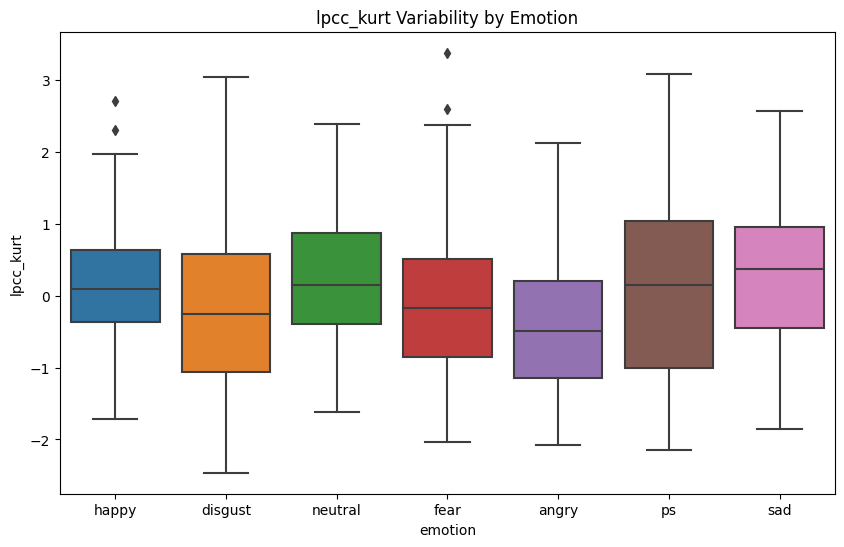

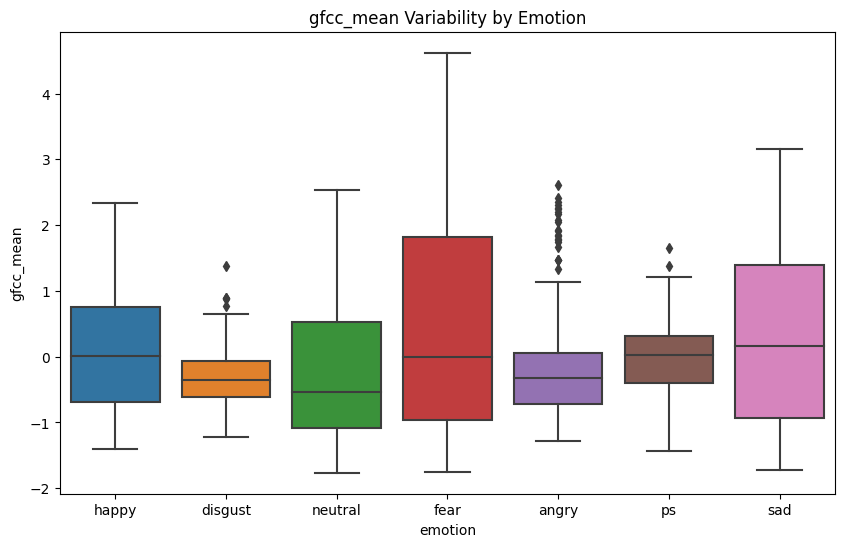

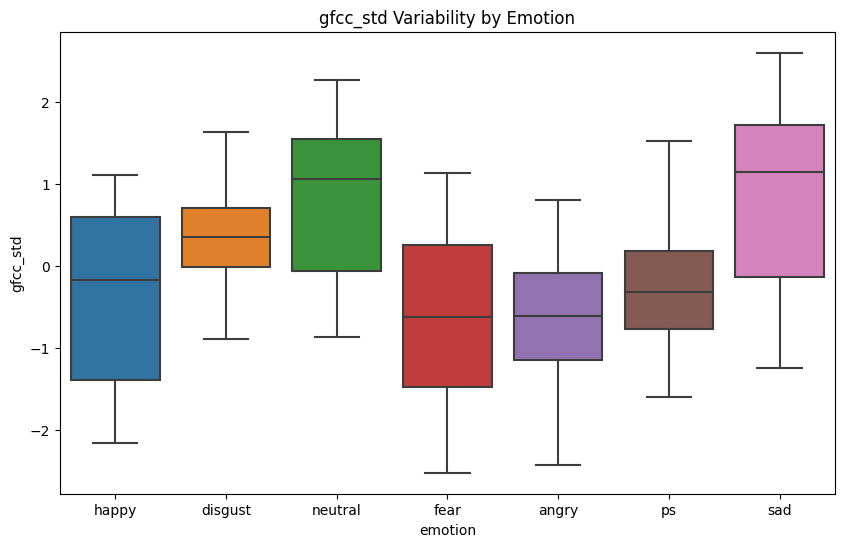

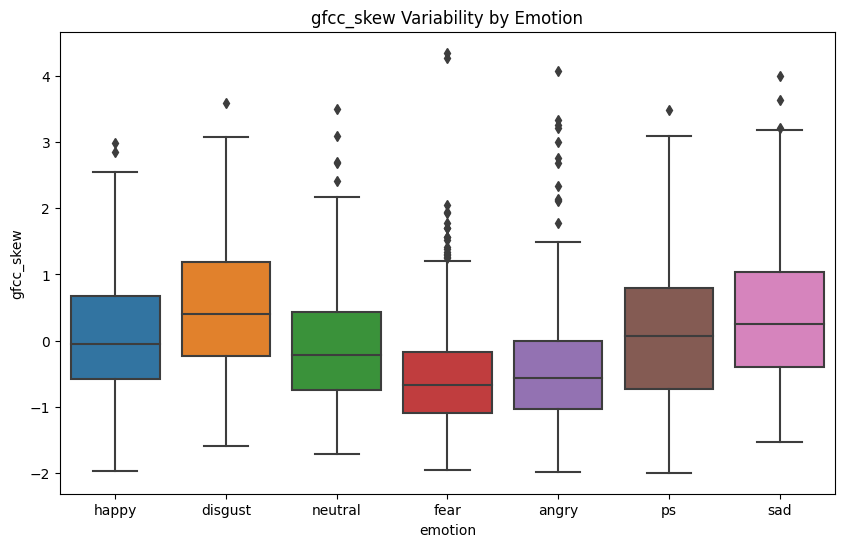

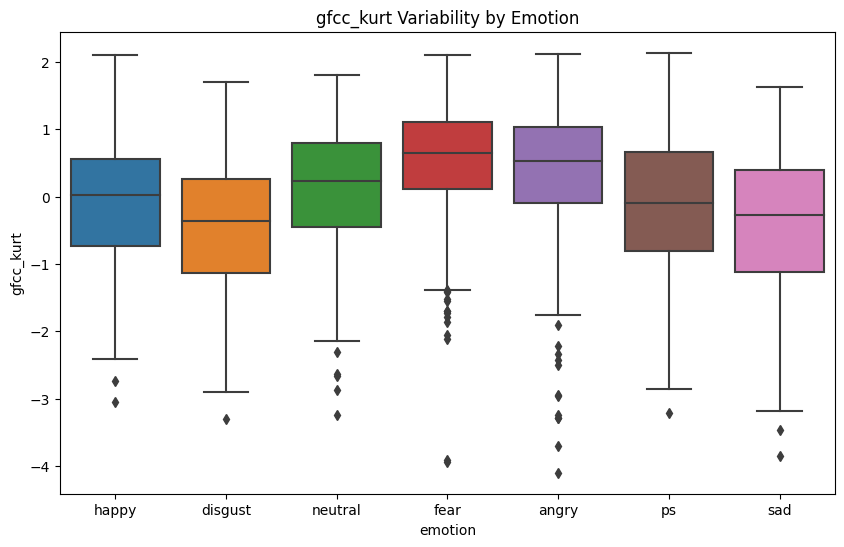

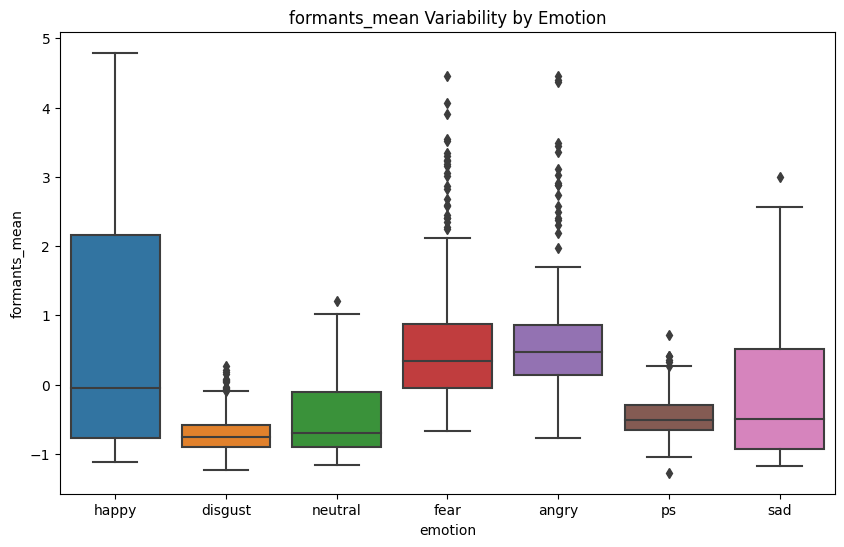

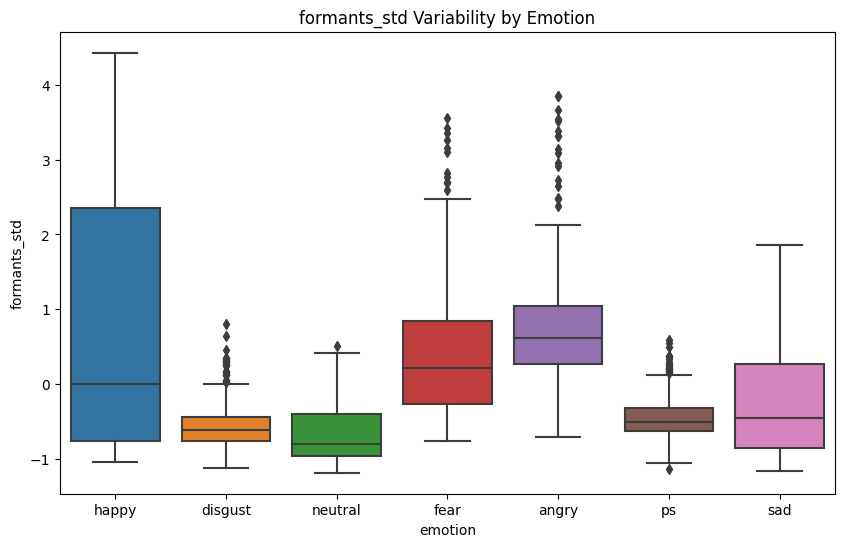

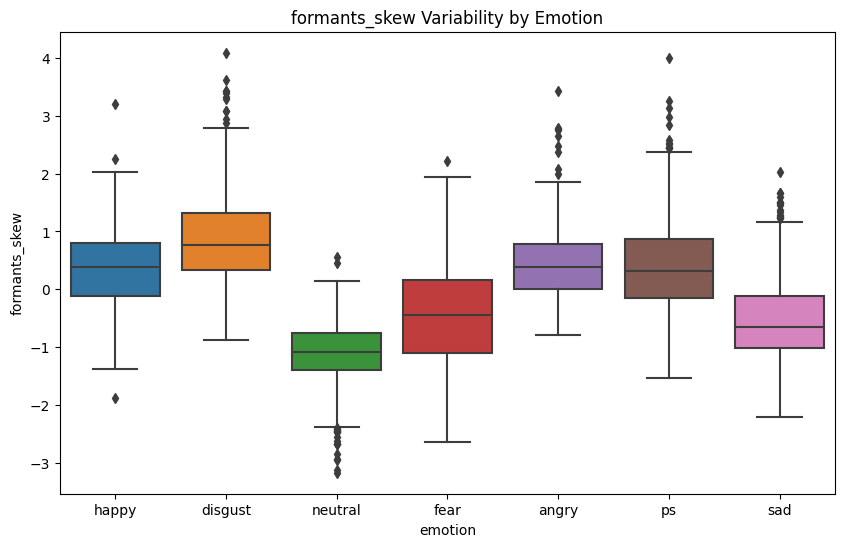

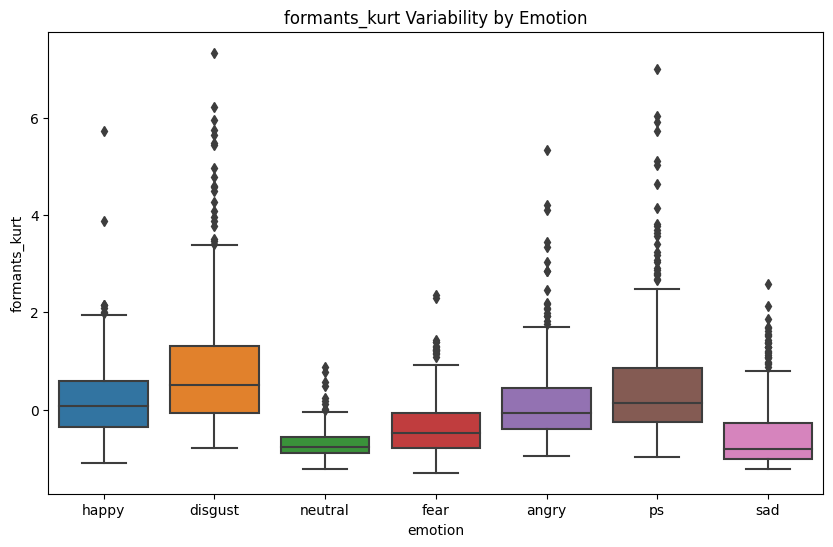

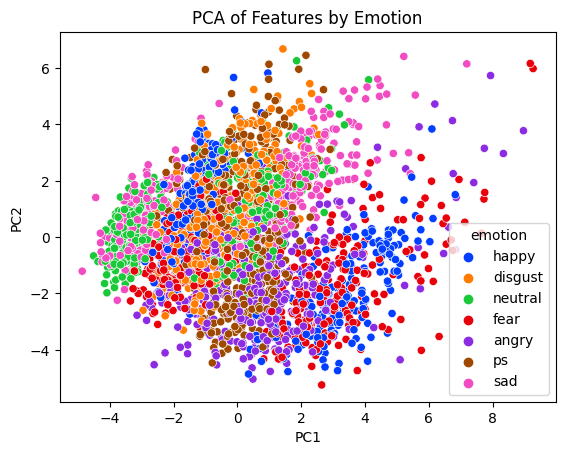

In [31]:
#file_path = '/features/acoustic_features.csv'
file_path = 'features/acoustic_features.csv'
#features_df = pd.read_csv(file_path)
#features_df['emotion'] = features_df['filename'].apply(lambda x: x.split('_')[-1].replace('.wav', ''))
acoustic_features_df = load_and_process_data(file_path)
acoustic_feature_names = ['mfcc', 'lpcc', 'gfcc', 'formants'] # Feature names to be processed and analyzed

# Process each feature set
for feature_name in acoustic_feature_names:
    features_df[f'{feature_name}_features'] = features_df[feature_name].apply(string_to_float_list)
    feature_stats = extract_statistical_features(features_df[f'{feature_name}_features'])
    feature_stats.columns = [f'{feature_name}_{col}' for col in feature_stats.columns]
    features_df = pd.concat([features_df, feature_stats], axis=1)

# Perform EDA
perform_eda_acoustic(features_df, acoustic_feature_names)

# Standardize the features
scaler = StandardScaler()
features_to_standardize = [f'{name}_{stat}' for name in acoustic_feature_names for stat in ['mean', 'std', 'skew', 'kurt']]
features_df[features_to_standardize] = scaler.fit_transform(features_df[features_to_standardize])
    
# Visualize the correlation matrix
visualize_correlation(features_df, features_to_standardize)

# Visualize emotion distributio
plot_emotion_distribution(features_df)

#Visualize feature distribution by emotion
for feature in features_to_standardize:
    plot_feature_distribution_by_emotion(features_df, feature)

# Visualize pairwise feature relationships
for feature in features_to_standardize:
    plot_feature_variability(features_df, feature)

# Visualize temporal featues
#for feature in feature_names:
#    plot_temporal_feature(feat)

# Visalize principle components
plot_pca_scatter(features_df, features_to_standardize)

### Prosodic feature analysis

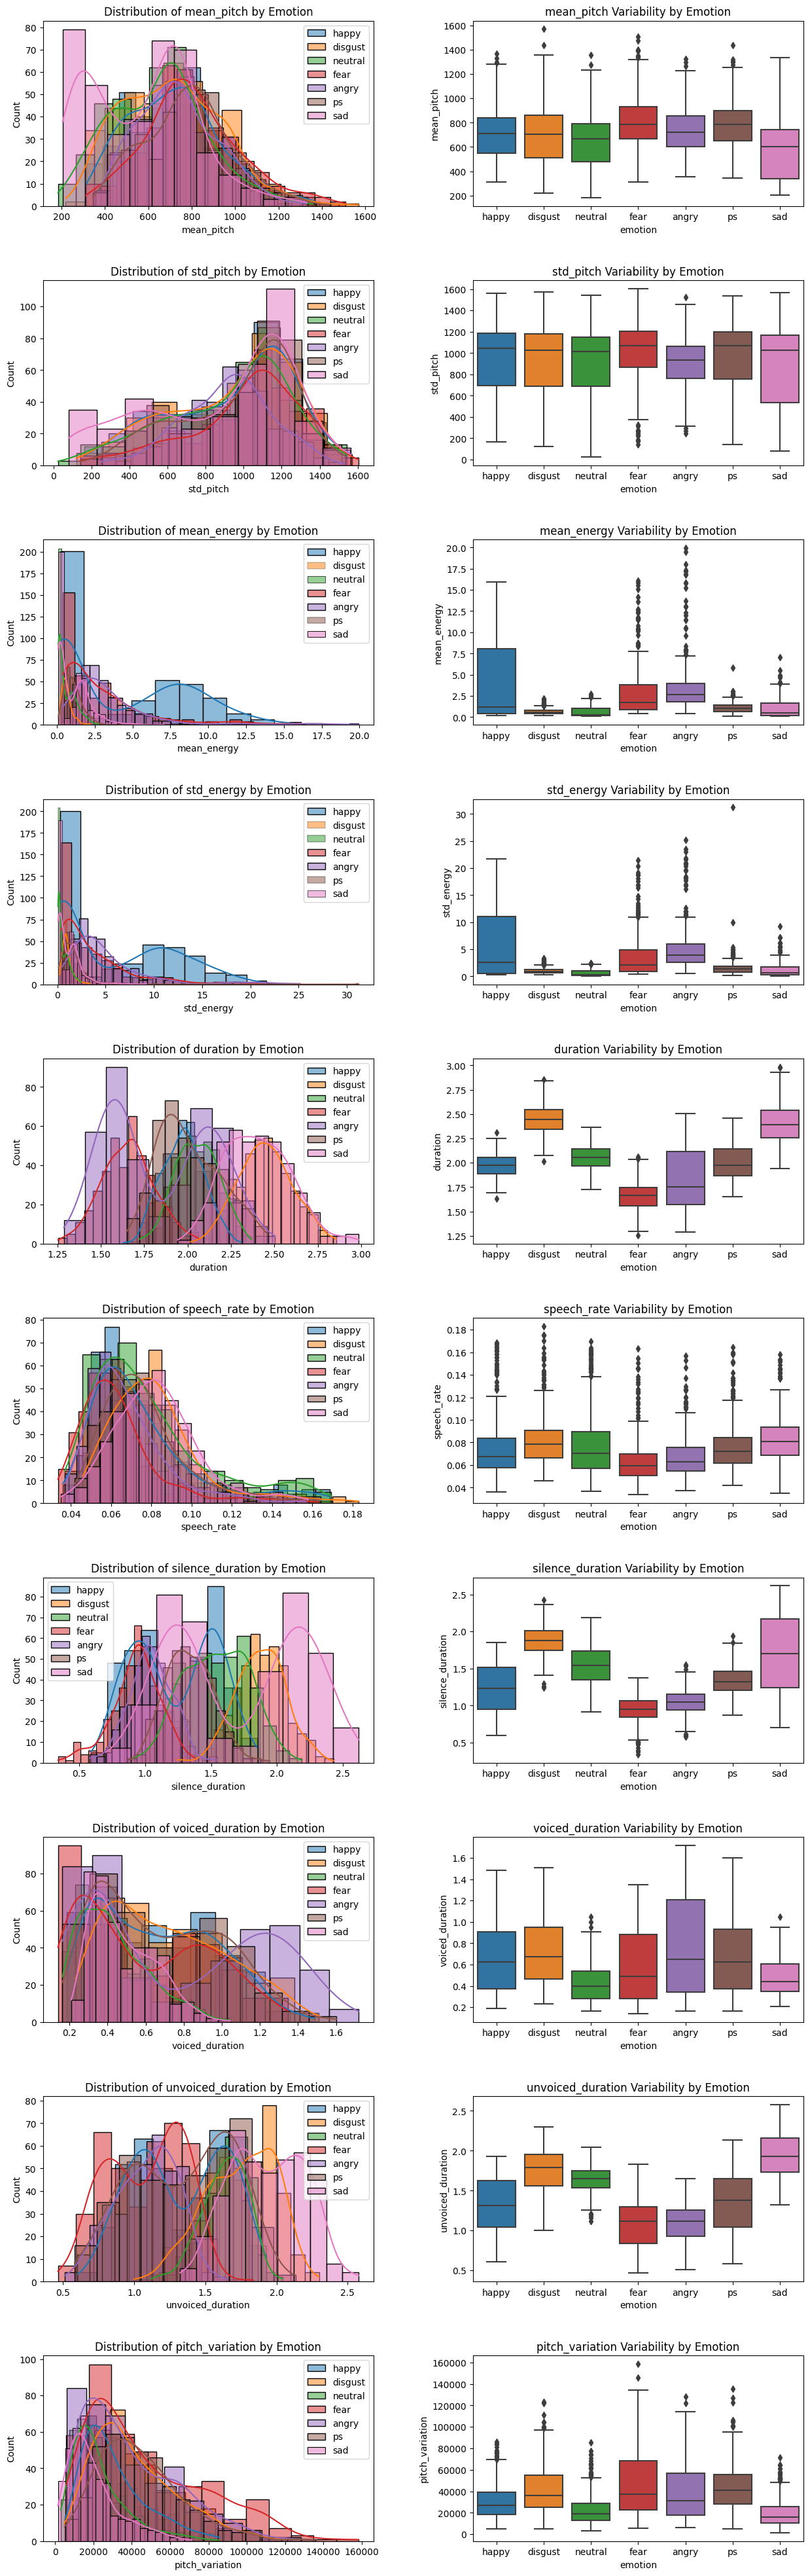

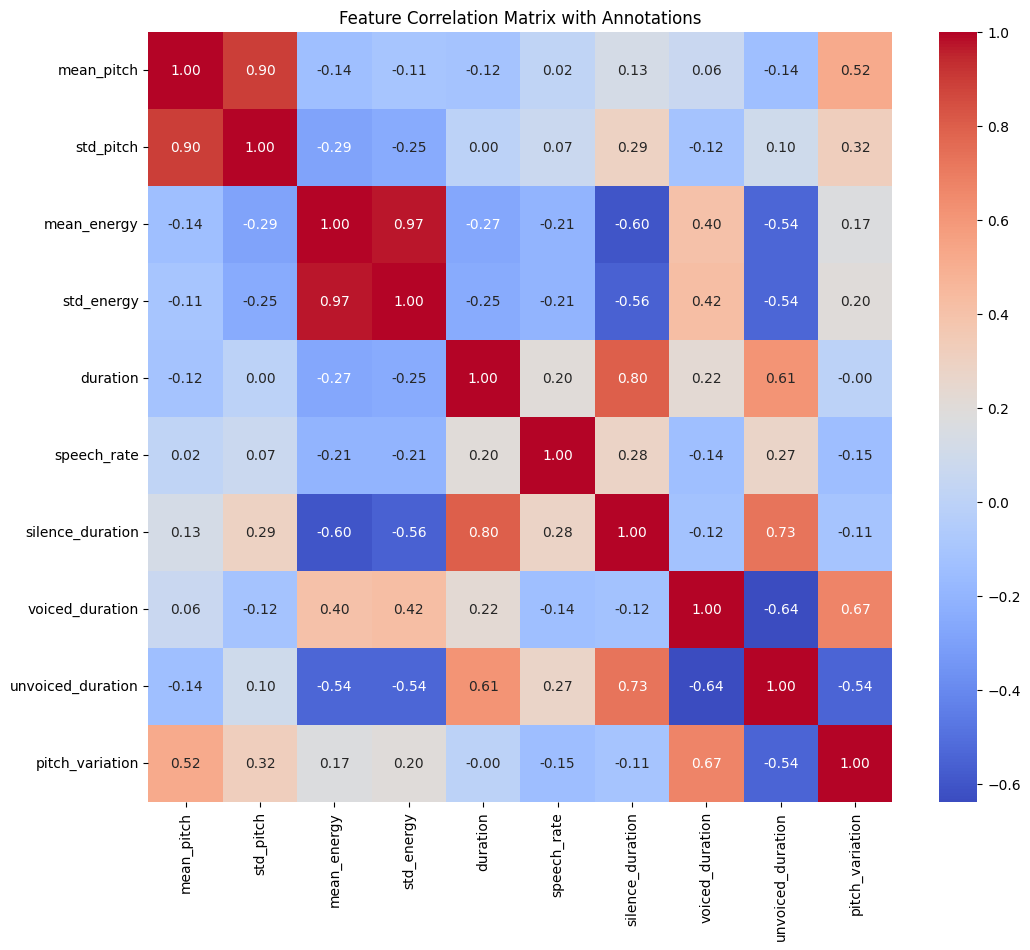

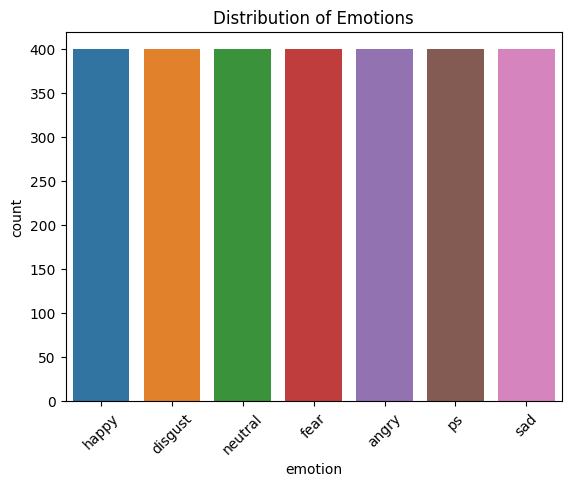

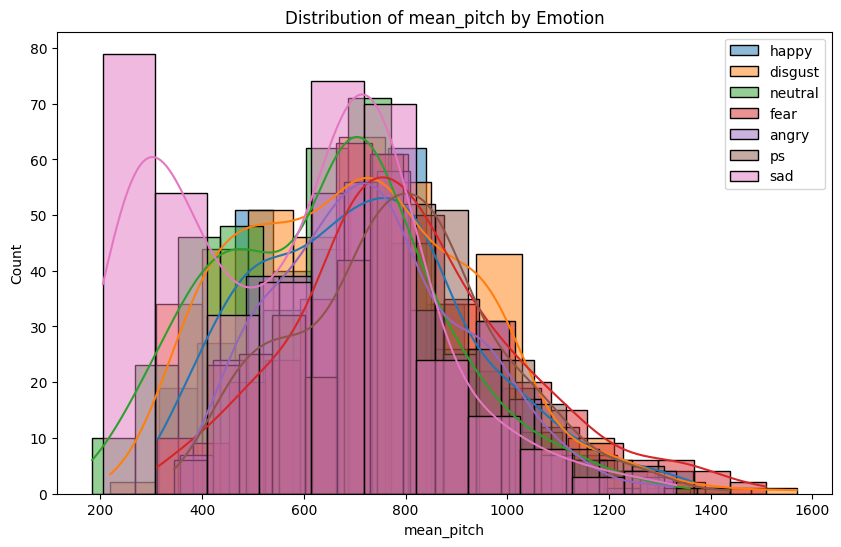

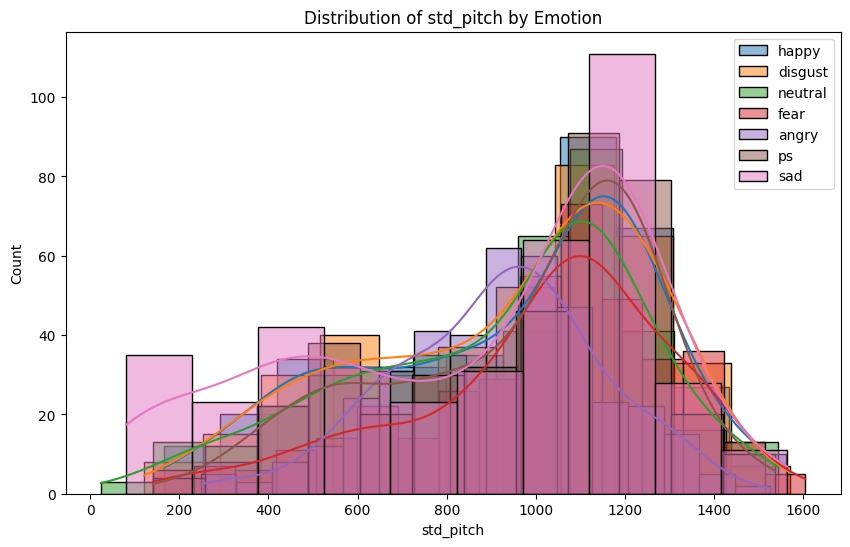

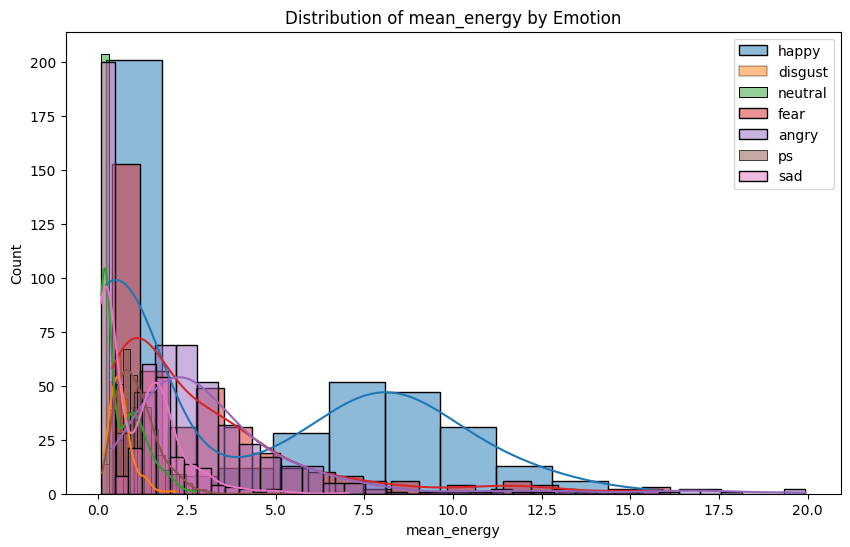

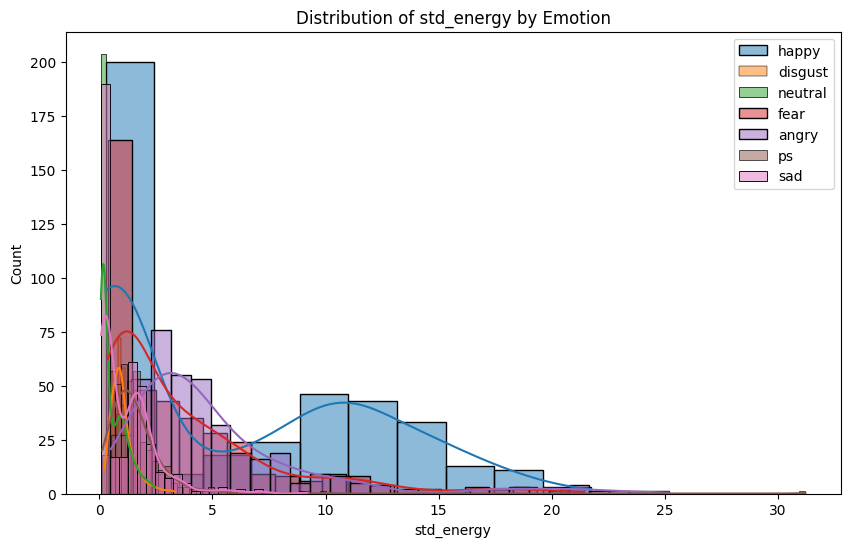

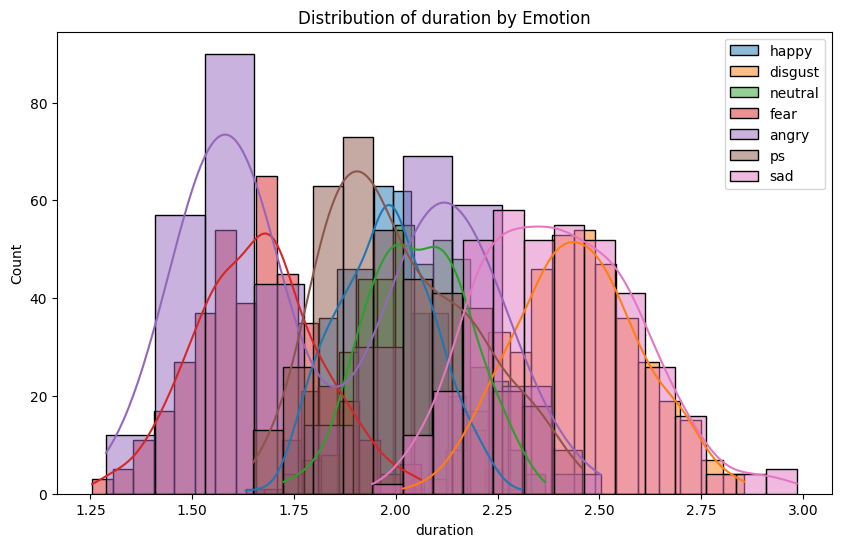

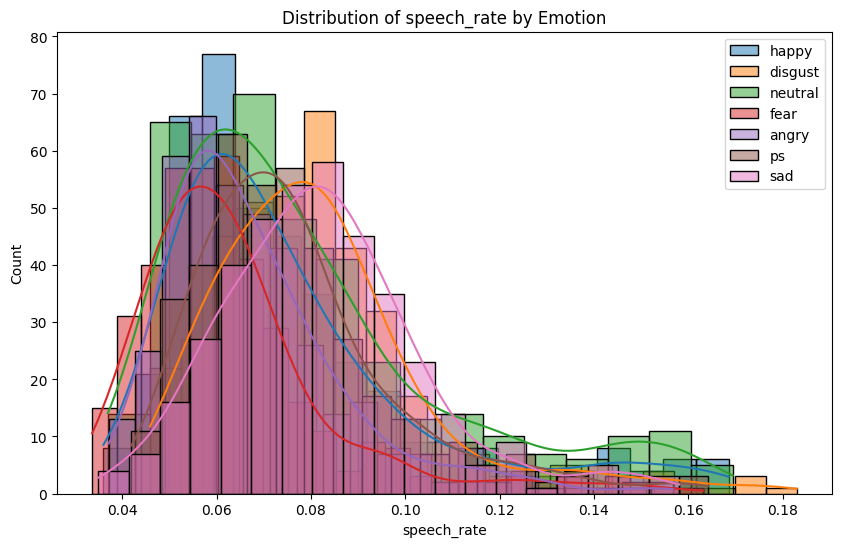

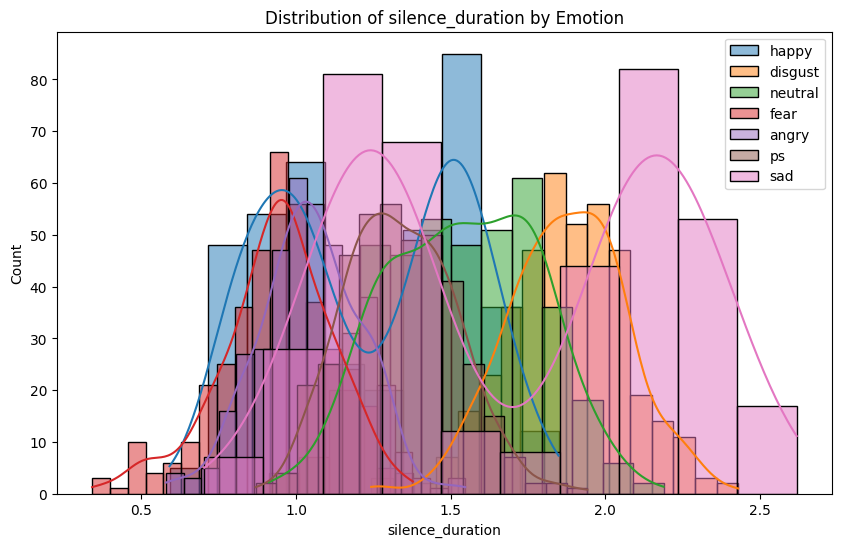

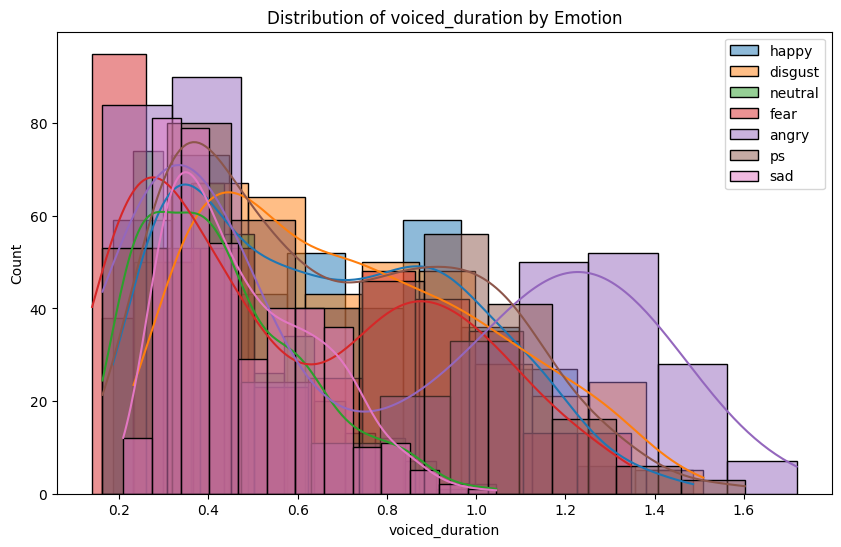

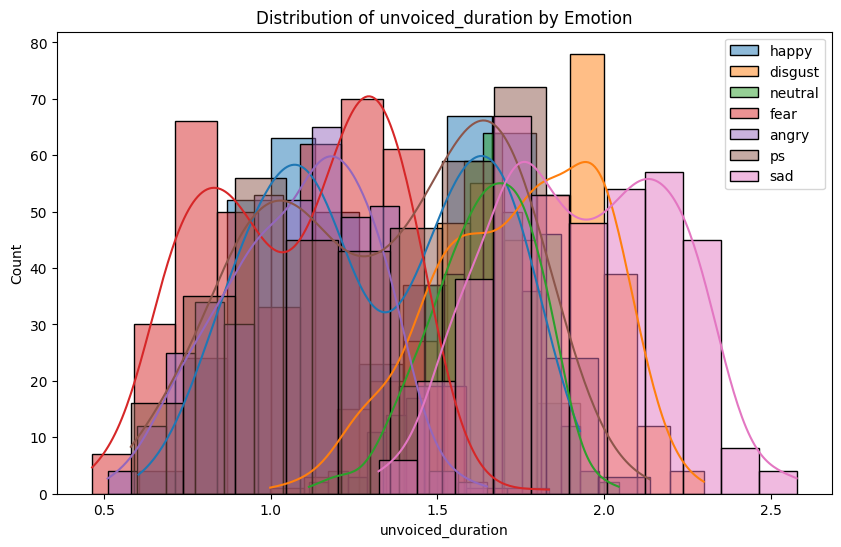

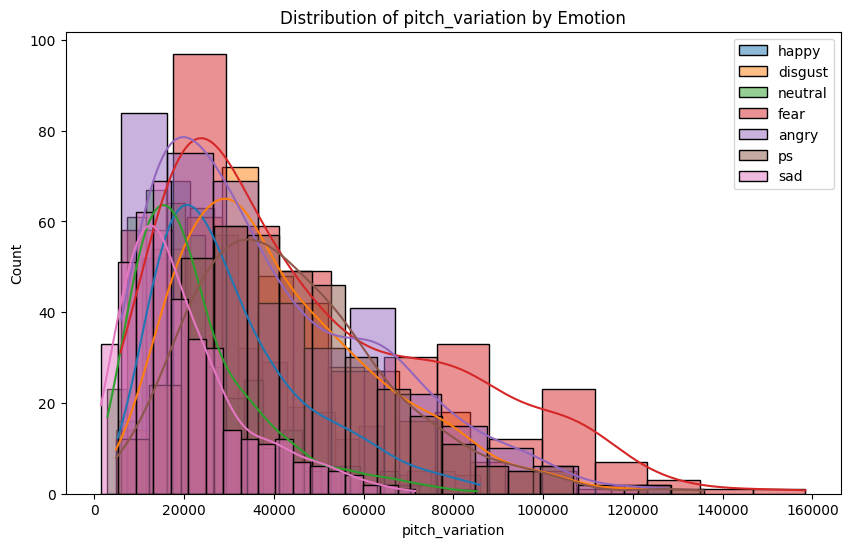

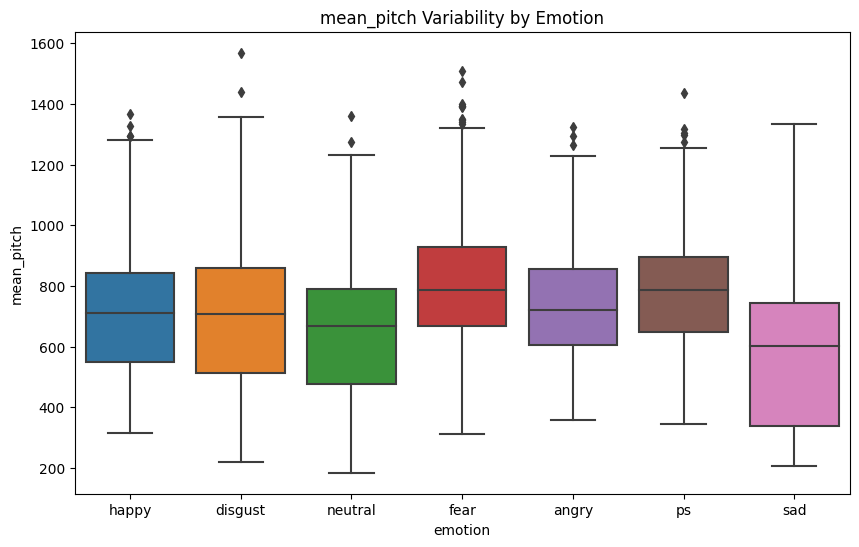

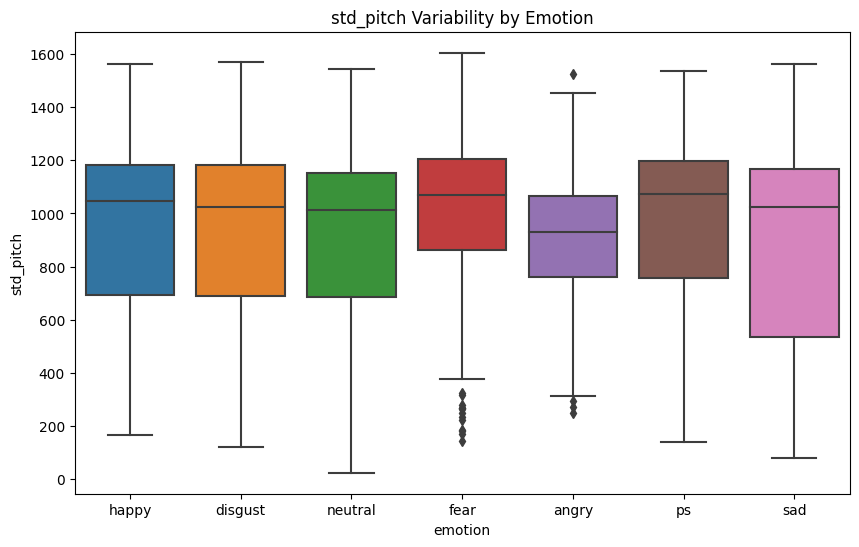

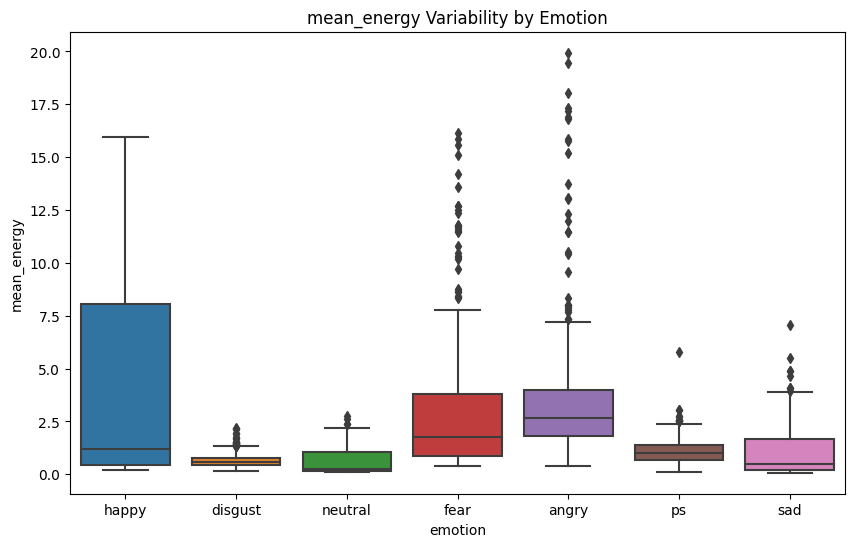

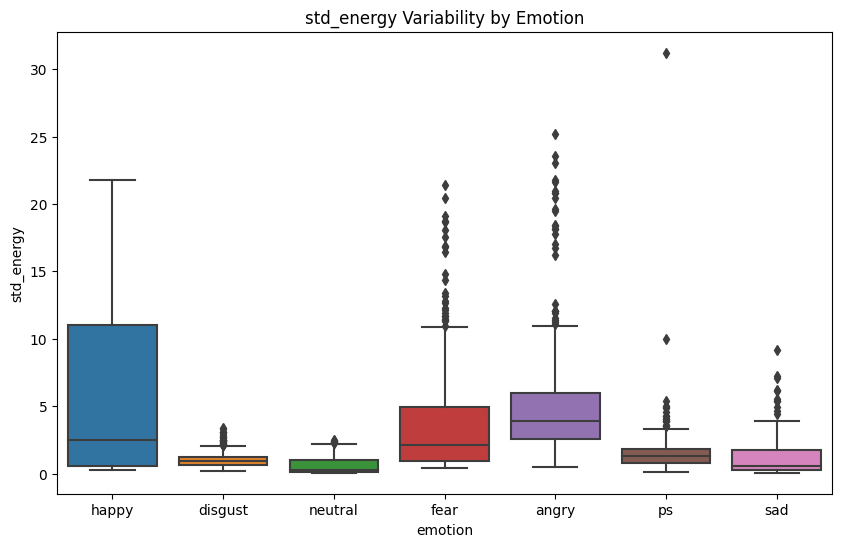

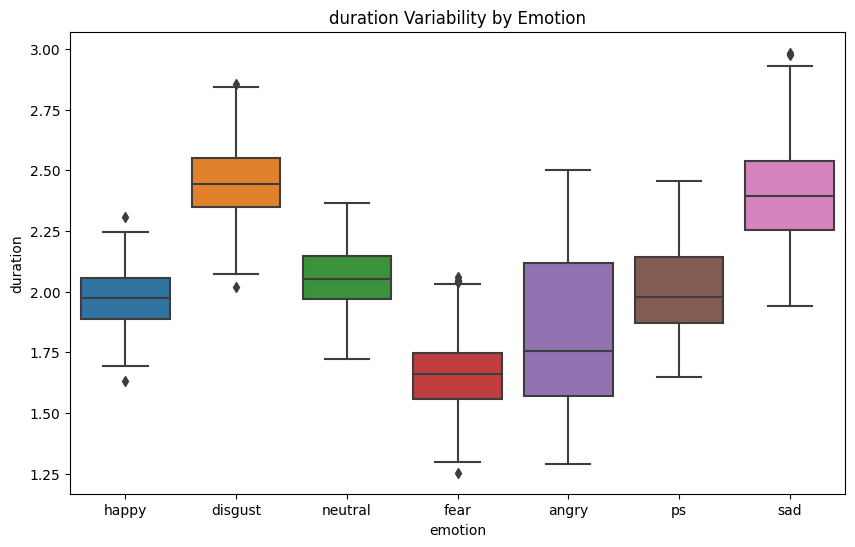

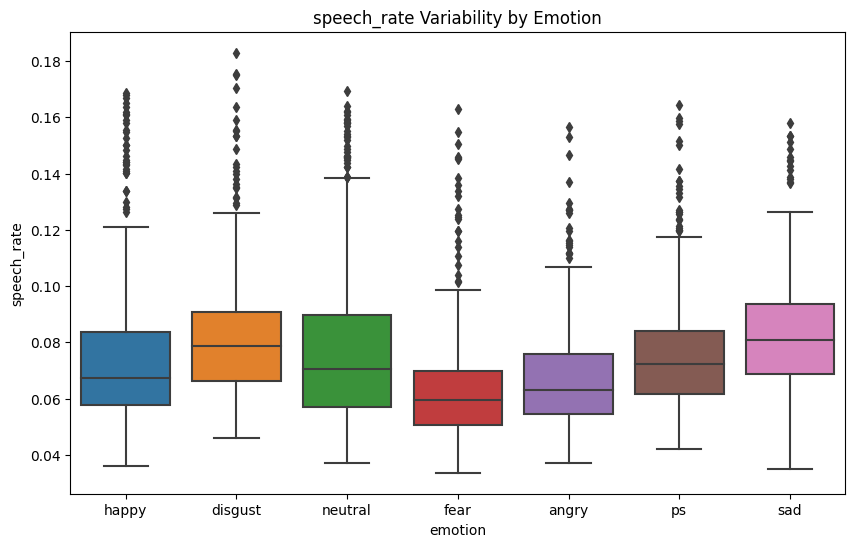

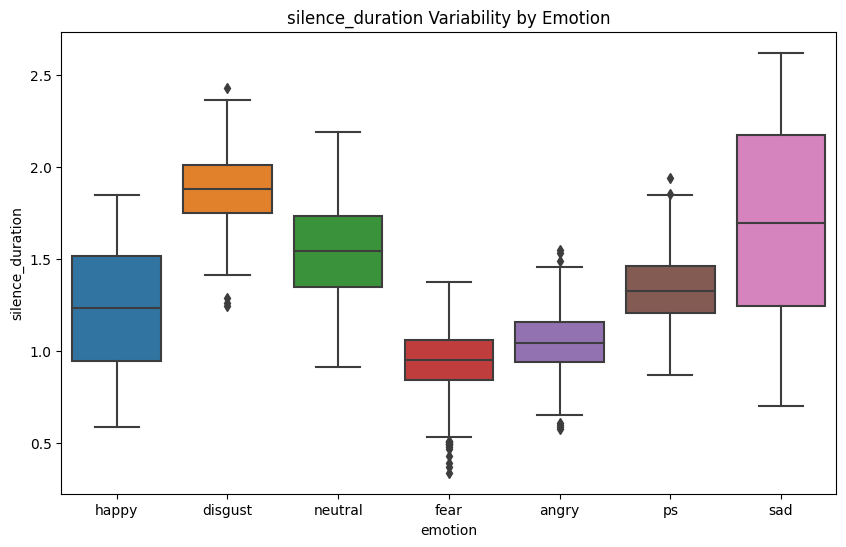

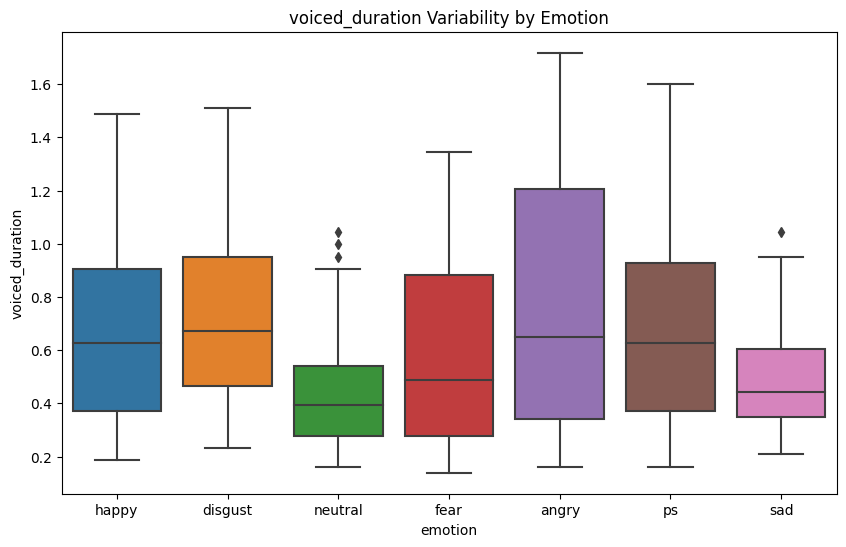

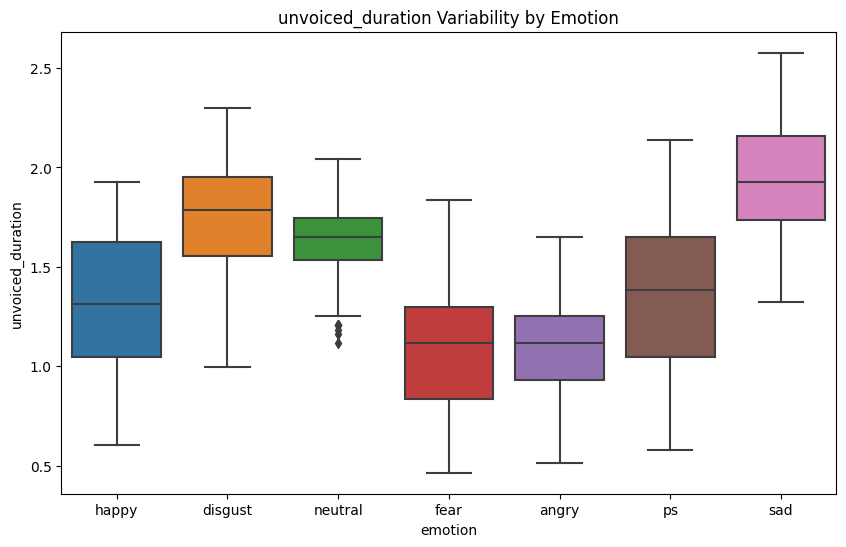

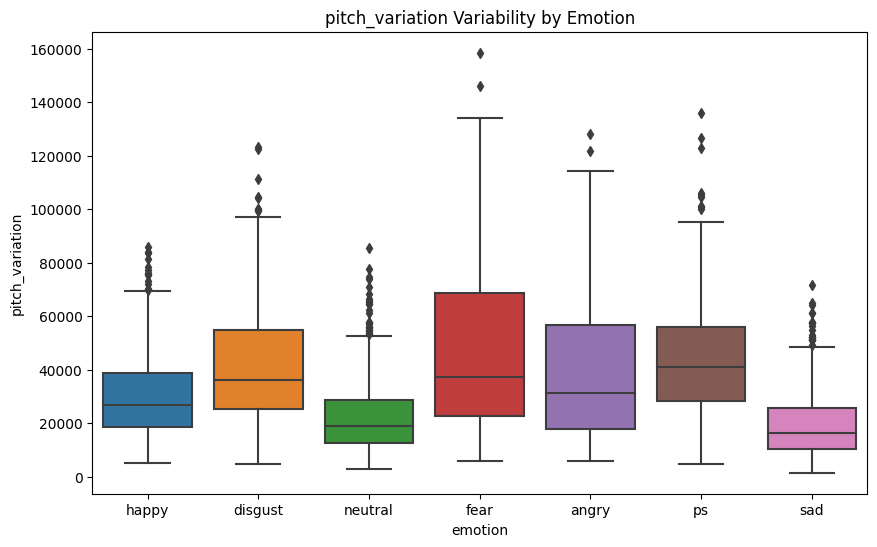

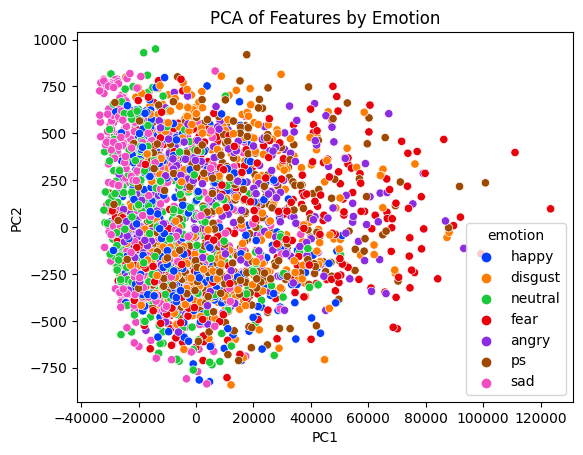

In [46]:
file_path = 'features/prosodic_features.csv'
prosodic_features_df = load_and_process_data(file_path)
prosodic_feature_columns = ['mean_pitch', 'std_pitch', 'mean_energy', 'std_energy', 'duration', 'speech_rate', 
                   'silence_duration', 'voiced_duration', 'unvoiced_duration', 'pitch_variation'] # Feature names to be processed and analyzed
#prosodic_feature_columns = ['mean_pitch', 'speech_rate', 'duration', 'voiced_duration', 'pitch_variation']
# Perform EDA
perform_eda_prosodic(prosodic_features_df, prosodic_feature_columns)

# Visualize the correlation matrix
visualize_correlation(prosodic_features_df, prosodic_feature_columns)

# Visualize emotion distributio
plot_emotion_distribution(prosodic_features_df)

#Visualize feature distribution by emotion
for feature in prosodic_feature_columns:
    plot_feature_distribution_by_emotion(prosodic_features_df, feature)

# Visualize pairwise feature relationships
for feature in prosodic_feature_columns:
    plot_feature_variability(prosodic_features_df, feature)

# Visualize temporal featues
#for feature in feature_names:
#    plot_temporal_feature(feat)

# Visalize principle components
plot_pca_scatter(prosodic_features_df, prosodic_feature_columns)